<a href="https://colab.research.google.com/github/PhilR1127/Data-601-Final-Project-/blob/main/Update_11_30_Data699_Project_Nov_11_Notebook_1_%2B2_ONLY_OUTPATIENT_DEATHS__Include_AVG__BMI_data_with_pycaret_and_Fix_Imbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
## downloading the CSV File that is a left Outer join of my original table in Notebook 1 with AVG_BMI information

In [3]:
##df=pd.read_csv(r"C:\Users\robil\Documents\Data 699\data699_final_patient_file_v2_with avg_BMI .csv")

In [4]:
from google.colab import files
uploaded = files.upload()

Saving data699_final_patient_file_v2_with avg_BMI .csv to data699_final_patient_file_v2_with avg_BMI .csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data699_final_patient_file_v2_with avg_BMI .csv']))
# Dataset is now stored in a Pandas Dataframe

In [6]:
print(df)

        subject_id  AGE_patient      AVG_HR     AVG_SBP    AVG_DBP  \
0         17755225           18  114.000000  126.000000  86.000000   
1         13039387           18   77.000000  141.250000  74.500000   
2         14241431           18   85.666667  124.000000  76.333333   
3         14332783           18   74.000000  103.500000  62.250000   
4         13898871           18   90.037037  112.629630  75.925926   
...            ...          ...         ...         ...        ...   
119352    10582595           91  113.428571  160.000000  76.000000   
119353    18975602           91   87.400000  130.222222  64.666667   
119354    15056066           91   94.750000  152.000000  75.250000   
119355    12426170           91   74.000000  123.400000  51.800000   
119356    16100048           91   83.375000  127.250000  67.875000   

         AVG_O2SAT    AVG_BMI             atime             dtime  inptdeath  \
0       100.000000  21.450000   2/23/2154 17:24    3/2/2154 16:10          0   

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119357 entries, 0 to 119356
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   subject_id     119357 non-null  int64  
 1   AGE_patient    119357 non-null  int64  
 2   AVG_HR         118846 non-null  float64
 3   AVG_SBP        118825 non-null  float64
 4   AVG_DBP        118825 non-null  float64
 5   AVG_O2SAT      117452 non-null  float64
 6   AVG_BMI        88346 non-null   float64
 7   atime          119357 non-null  object 
 8   dtime          119357 non-null  object 
 9   inptdeath      119357 non-null  int64  
 10  Date_of_Death  17676 non-null   object 
dtypes: float64(5), int64(3), object(3)
memory usage: 10.0+ MB


In [8]:
##Begin Exploration of Dataset, Tranforamtion and EDA:
##Would like to evaluate Length of Stay ... in order to calulate will need subtract discharge time (dtime)
## from admission time (atime)
## Use pd.to_datetime() to change :

df['atime'] = pd.to_datetime(df['atime'])

In [9]:
df['dtime'] =pd.to_datetime(df['dtime'])

In [10]:
df['Date_of_Death'] =pd.to_datetime(df['Date_of_Death'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119357 entries, 0 to 119356
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   subject_id     119357 non-null  int64         
 1   AGE_patient    119357 non-null  int64         
 2   AVG_HR         118846 non-null  float64       
 3   AVG_SBP        118825 non-null  float64       
 4   AVG_DBP        118825 non-null  float64       
 5   AVG_O2SAT      117452 non-null  float64       
 6   AVG_BMI        88346 non-null   float64       
 7   atime          119357 non-null  datetime64[ns]
 8   dtime          119357 non-null  datetime64[ns]
 9   inptdeath      119357 non-null  int64         
 10  Date_of_Death  17676 non-null   datetime64[ns]
dtypes: datetime64[ns](3), float64(5), int64(3)
memory usage: 10.0 MB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subject_id,119357.0,1.501336e+07,2.888151e+06,10000032.0,1.250253e+07,1.502683e+07,1.752118e+07,1.999999e+07
AGE_patient,119357.0,5.487997e+01,2.022042e+01,18.0,3.800000e+01,5.600000e+01,7.100000e+01,9.100000e+01
AVG_HR,118846.0,8.074642e+01,1.419299e+01,7.0,7.100000e+01,7.950000e+01,8.907143e+01,1.979091e+02
AVG_SBP,118825.0,1.282535e+02,1.729913e+01,10.0,1.160769e+02,1.268000e+02,1.386667e+02,2.930000e+02
AVG_DBP,118825.0,7.447109e+01,9.353750e+01,6.0,6.577778e+01,7.266667e+01,8.000000e+01,2.602850e+04
AVG_O2SAT,117452.0,9.791316e+01,2.792009e+00,0.0,9.700000e+01,9.816667e+01,9.900000e+01,4.998000e+02
AVG_BMI,88346.0,3.336802e+01,3.834796e+02,0.0,2.380000e+01,2.740000e+01,3.200000e+01,1.078402e+05
inptdeath,119357.0,3.964577e-02,1.951264e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [13]:
import numpy as np

In [14]:
## Hypothesis is that Markers associated with CRF and/or decreased morbidity in short term or long term studies can be used to predict near/moderate term risk of death (within one year of discharge from hospital)using MIMIC-IV dataset.
## (Quieried multiple tables in MIMIC-IV Hospital and ED Datasets to create this dataset)
## Would initially like to evaluate measures of cardiovascular health and their potential impact on near term outpatient death INDEPENDANT of sex,race and medical diagnosis.. to see how accurate of a model I can build
## Need to add new variables and transform existing ones: (Est VO2_Max, Pulse_Pressure, Oxygen (O2)_Saturation and BMI)

In [15]:
df['AVG_O2SAT'] = pd.to_numeric(df['AVG_O2SAT'])

In [16]:
df['AVG_HR'] = pd.to_numeric(df['AVG_HR'])

In [17]:
##Create three new variables:
#1. Pulse Pressure (https://www.ahajournals.org/doi/10.1161/hy1001.092966)
#2.Maximum Heart Rate (which is calculated based on age of patient, and will be used to calculate:
#3.Estimated Vo2 Max (https://pubmed.ncbi.nlm.nih.gov/29293447/, https://pubmed.ncbi.nlm.nih.gov/30139444/)
## Hypothesis is that vO2_Max (long term) Pulse_Pressure, and O2Sat (Acute) all seem to impact either acute or
##long term health/morbidity/mortality... evaluating on this dataset for death within one year (short term mortality)

In [18]:
df['Max_HR'] = (208-(df['AGE_patient']))

In [19]:
## Simple formula for Pulse Pressure... Systolic Blood Pressure - Diastolic Blood Pressure
df['Pulse_Pressure'] = (df['AVG_SBP'])-(df['AVG_DBP'])

In [20]:
## formula for calculating Estimated vO2 Max:
df['Est_vO2_Max'] = (df['Max_HR'])/(df['AVG_HR'])*15.3

In [21]:
#Create three additional time related variables... for future reference
## interested to see if length of stay in particular has impact on risk of death within one year post discharge: (May be used in next stage of evaluation, when attempting to create a model  that includes other variable for maximum accuracy)
#1. Length of Stay
#2.Time to Patient Death post Discharge

In [22]:
df['Length_of_Stay']=((df['dtime'])-(df['atime']))

In [23]:
df['Time_to_Outpatient_Death'] = ((df['Date_of_Death'])-df['dtime'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119357 entries, 0 to 119356
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   subject_id                119357 non-null  int64          
 1   AGE_patient               119357 non-null  int64          
 2   AVG_HR                    118846 non-null  float64        
 3   AVG_SBP                   118825 non-null  float64        
 4   AVG_DBP                   118825 non-null  float64        
 5   AVG_O2SAT                 117452 non-null  float64        
 6   AVG_BMI                   88346 non-null   float64        
 7   atime                     119357 non-null  datetime64[ns] 
 8   dtime                     119357 non-null  datetime64[ns] 
 9   inptdeath                 119357 non-null  int64          
 10  Date_of_Death             17676 non-null   datetime64[ns] 
 11  Max_HR                    119357 non-null  int64    

In [25]:
## confirm that all of the patients (subject_id) are only entered one time and are not duplicated.. should get N= 119357
df.nunique()

subject_id                  119357
AGE_patient                     73
AVG_HR                       15245
AVG_SBP                      16272
AVG_DBP                      13701
AVG_O2SAT                     5227
AVG_BMI                      24024
atime                       118936
dtime                       118644
inptdeath                        2
Date_of_Death                13641
Max_HR                          73
Pulse_Pressure               33105
Est_vO2_Max                  64454
Length_of_Stay               21578
Time_to_Outpatient_Death     12486
dtype: int64

In [26]:
df['Time_to_Outpatient_Death'].value_counts()

0 days 00:00:00      305
-1 days +09:00:00     49
-1 days +23:59:00     47
-1 days +13:00:00     34
-1 days +05:00:00     33
                    ... 
32 days 05:30:00       1
317 days 16:28:00      1
134 days 05:00:00      1
172 days 05:34:00      1
0 days 06:14:00        1
Name: Time_to_Outpatient_Death, Length: 12486, dtype: int64

In [27]:
df['Length_of_Stay'].value_counts()

0 days 19:42:00     50
0 days 21:35:00     45
0 days 18:45:00     42
0 days 19:18:00     42
0 days 21:34:00     42
                    ..
9 days 13:57:00      1
8 days 10:31:00      1
25 days 23:08:00     1
22 days 15:51:00     1
10 days 15:41:00     1
Name: Length_of_Stay, Length: 21578, dtype: int64

In [28]:
df.head(3)

,subject_id,AGE_patient,AVG_HR,AVG_SBP,AVG_DBP,AVG_O2SAT,AVG_BMI,atime,dtime,inptdeath,Date_of_Death,Max_HR,Pulse_Pressure,Est_vO2_Max,Length_of_Stay,Time_to_Outpatient_Death
0,17755225,18,114.000000,126.00,86.000000,100.00,21.45,2154-02-23 17:24:00,2154-03-02 16:10:00,0,2154-10-16,190,40.000000,25.500000,6 days 22:46:00,227 days 07:50:00
1,13039387,18,77.000000,141.25,74.500000,98.25,NaN,2138-12-25 23:39:00,2138-12-28 11:30:00,0,2139-08-17,190,66.750000,37.753247,2 days 11:51:00,231 days 12:30:00
2,14241431,18,85.666667,124.00,76.333333,99.00,NaN,2117-04-16 01:48:00,2117-04-16 06:36:00,0,2118-01-02,190,47.666667,33.933852,0 days 04:48:00,260 days 17:24:00


In [29]:
df.tail(3)

,subject_id,AGE_patient,AVG_HR,AVG_SBP,AVG_DBP,AVG_O2SAT,AVG_BMI,atime,dtime,inptdeath,Date_of_Death,Max_HR,Pulse_Pressure,Est_vO2_Max,Length_of_Stay,Time_to_Outpatient_Death
119354,15056066,91,94.750,152.00,75.250,96.000,NaN,2110-01-31 02:35:00,2110-02-03 15:53:00,0,NaT,117,76.750,18.892876,3 days 13:18:00,NaT
119355,12426170,91,74.000,123.40,51.800,97.400,NaN,2110-01-27 22:16:00,2110-02-01 15:50:00,0,NaT,117,71.600,24.190541,4 days 17:34:00,NaT
119356,16100048,91,83.375,127.25,67.875,97.875,24.4,2110-01-27 18:36:00,2110-01-28 16:03:00,0,NaT,117,59.375,21.470465,0 days 21:27:00,NaT


In [30]:
df.describe()

,subject_id,AGE_patient,AVG_HR,AVG_SBP,AVG_DBP,AVG_O2SAT,AVG_BMI,inptdeath,Max_HR,Pulse_Pressure,Est_vO2_Max,Length_of_Stay,Time_to_Outpatient_Death
count,1.193570e+05,119357.000000,118846.000000,118825.000000,118825.000000,117452.000000,88346.000000,119357.000000,119357.000000,118825.000000,118846.000000,119357,17676
mean,1.501336e+07,54.879974,80.746417,128.253461,74.471090,97.913155,33.368016,0.039646,153.120026,53.782371,29.849081,4 days 05:36:44.826193687,98 days 08:18:55.037338765
std,2.888151e+06,20.220418,14.192993,17.299130,93.537499,2.792009,383.479599,0.195126,20.220418,94.291275,6.414420,6 days 14:38:54.676416964,216 days 18:41:20.077168744
min,1.000003e+07,18.000000,7.000000,10.000000,6.000000,0.000000,0.000000,0.000000,117.000000,-25925.000000,11.444400,-1 days +01:21:00,-2172 days +06:30:00
25%,1.250253e+07,38.000000,71.000000,116.076923,65.777778,97.000000,23.800000,0.000000,137.000000,45.000000,25.442697,0 days 22:48:00,-1 days +23:29:30
50%,1.502683e+07,56.000000,79.500000,126.800000,72.666667,98.166667,27.400000,0.000000,152.000000,52.682927,29.327688,2 days 12:19:00,26 days 11:00:00
75%,1.752118e+07,71.000000,89.071429,138.666667,80.000000,99.000000,32.000000,0.000000,170.000000,63.000000,33.636641,4 days 20:52:00,132 days 06:41:00
max,1.999999e+07,91.000000,197.909091,293.000000,26028.500000,499.800000,107840.200000,1.000000,190.000000,221.000000,340.971429,234 days 01:00:00,3901 days 20:30:00


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119357 entries, 0 to 119356
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   subject_id                119357 non-null  int64          
 1   AGE_patient               119357 non-null  int64          
 2   AVG_HR                    118846 non-null  float64        
 3   AVG_SBP                   118825 non-null  float64        
 4   AVG_DBP                   118825 non-null  float64        
 5   AVG_O2SAT                 117452 non-null  float64        
 6   AVG_BMI                   88346 non-null   float64        
 7   atime                     119357 non-null  datetime64[ns] 
 8   dtime                     119357 non-null  datetime64[ns] 
 9   inptdeath                 119357 non-null  int64          
 10  Date_of_Death             17676 non-null   datetime64[ns] 
 11  Max_HR                    119357 non-null  int64    

In [32]:
#Now need to clean the data/columns that I will be using in the models (remove or transform missing from tables of interest, and need to set up a target variable
##to run initial model - a logistic regression on a new variable called "Survival" (0 = patients that died either
##during admission or within one year of discharge,,,and 1 = patients that survived)

In [33]:
## check for null and not null values, focus on Date of Death (which appears to include both dates of inpatient and outpatient deaths)
df.notnull().sum()

subject_id                  119357
AGE_patient                 119357
AVG_HR                      118846
AVG_SBP                     118825
AVG_DBP                     118825
AVG_O2SAT                   117452
AVG_BMI                      88346
atime                       119357
dtime                       119357
inptdeath                   119357
Date_of_Death                17676
Max_HR                      119357
Pulse_Pressure              118825
Est_vO2_Max                 118846
Length_of_Stay              119357
Time_to_Outpatient_Death     17676
dtype: int64

In [34]:
df.isnull().sum()

subject_id                       0
AGE_patient                      0
AVG_HR                         511
AVG_SBP                        532
AVG_DBP                        532
AVG_O2SAT                     1905
AVG_BMI                      31011
atime                            0
dtime                            0
inptdeath                        0
Date_of_Death               101681
Max_HR                           0
Pulse_Pressure                 532
Est_vO2_Max                    511
Length_of_Stay                   0
Time_to_Outpatient_Death    101681
dtype: int64

In [35]:
##Comparing "isnull_sum" variable counts to "notnull.sum() varaible counts shows that I will need to:

#1- either remove or normalize the small number of Null values in the AVG_HR,
#AVG_SBP, AVG_DBP, AVG_O2SAT, and AVG_Pulse_Pressure... since these are all fairly small numbers of missing rows
#(~500 to 1900) compared to the total number of patients of 119,357 in the dataframe of ... I am just going to set
##each of these missing values equal to the mean for that particlular variable.

#2 - Set "Date of Death" to the dependant varaible for logisitic regression (as a new variable "Survival")
##There are 17,676 NOT-Null values in this column... these would correspond to a death event.. either inpatient or outpatient
##(Set "death" = 0)
#There are 101,681 Null values in this column ... these would correspond to a patient living one year post discharge
##(Set "survival" = 1)

In [36]:
##If data in a column is actually missing, can use fillna() method... ie results['AVG_SBP']fillna(128.253461) ...
##fill with the mean of AVG_SBP.

##Then check transformed ['AVG_SBP] using results['AVG_SBP'].value_counts(dropna= false)...
##should see this 128.253461 show up 532 times (532 represents null though, not missing... need to doublecheck this)

##once have all columns fixed for missing data, can apply results.hist(figsize =20,20) to look at outliers:

##For target variable "Date_Of_Death" will need to change title to Survival and make 0 = death and 1 = survival....
##so change all the null values to "1":

## Because Avg_BMI has so many null values (31011).. I am going to leave out of initial regression model and
## address in Model #2 (eventually put this in Notebook 2)
## THIS CURRENT NOTEBOOK CONTAINS THE DATA ON BMI


In [37]:
df['AVG_HR']=df['AVG_HR'].fillna(80.746417)
df['AVG_SBP']=df['AVG_SBP'].fillna(128.253461)
df['AVG_DBP']=df['AVG_DBP'].fillna(74.471090)
df['AVG_O2SAT']=df['AVG_O2SAT'].fillna(97.913155)
df['Pulse_Pressure']=df['Pulse_Pressure'].fillna(110.326004)
df['Est_vO2_Max']=df['Est_vO2_Max'].fillna(29.849081)

In [38]:
## check we've transformed the nulls to the means for these columns
df.isnull().sum()

subject_id                       0
AGE_patient                      0
AVG_HR                           0
AVG_SBP                          0
AVG_DBP                          0
AVG_O2SAT                        0
AVG_BMI                      31011
atime                            0
dtime                            0
inptdeath                        0
Date_of_Death               101681
Max_HR                           0
Pulse_Pressure                   0
Est_vO2_Max                      0
Length_of_Stay                   0
Time_to_Outpatient_Death    101681
dtype: int64

array([[<Axes: title={'center': 'subject_id'}>,
        <Axes: title={'center': 'AGE_patient'}>,
        <Axes: title={'center': 'AVG_HR'}>,
        <Axes: title={'center': 'AVG_SBP'}>],
       [<Axes: title={'center': 'AVG_DBP'}>,
        <Axes: title={'center': 'AVG_O2SAT'}>,
        <Axes: title={'center': 'AVG_BMI'}>,
        <Axes: title={'center': 'atime'}>],
       [<Axes: title={'center': 'dtime'}>,
        <Axes: title={'center': 'inptdeath'}>,
        <Axes: title={'center': 'Date_of_Death'}>,
        <Axes: title={'center': 'Max_HR'}>],
       [<Axes: title={'center': 'Pulse_Pressure'}>,
        <Axes: title={'center': 'Est_vO2_Max'}>, <Axes: >, <Axes: >]],
      dtype=object)

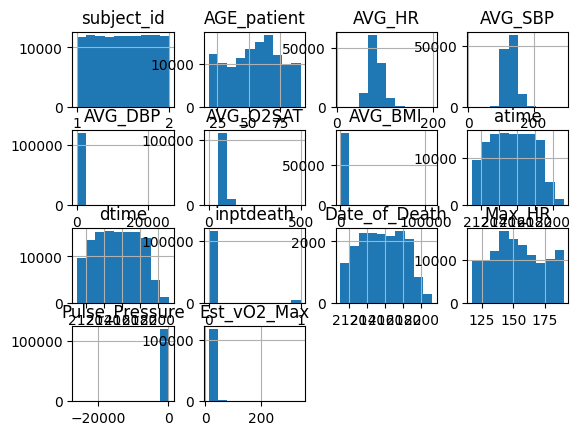

In [39]:
df.hist()

In [40]:
## will have to remove outliers for Est_vO2_Max for initial binary logistic regression...
##and then other columns for multiple variable

In [41]:
## Create a new column to stratify patients by age. MIMIC -IV is an adultdataset .. patients are age 18 to 91 (anyone over age 91 is simply identified as being "91")

In [42]:
##df.assign(Age_Group=pd.cut(df['AGE_patient'], bins=[17, 29, 39, 49, 59, 69,79,92], right=False, labels=[1, 2, 3,4,5,6,7]))
df['Age_Group'] = pd.cut(x=df['AGE_patient'], bins=[17, 29, 39, 49, 59, 69,79,92], right=False, labels=[1, 2, 3,4,5,6,7])

In [43]:
## First, will Need to convert the "Date_of_Death" datetime column to a new numeric column "Surival"
# with only "1" for survival and "0" for deaths

In [44]:
##found this in stackoverflow ....if it works create new column
df['Date_of_Death'].dt.strftime("%Y%m%d").astype(float)

0         21541016.0
1         21390817.0
2         21180102.0
3                NaN
4                NaN
             ...    
119352           NaN
119353           NaN
119354           NaN
119355           NaN
119356           NaN
Name: Date_of_Death, Length: 119357, dtype: float64

In [45]:
df['Survival'] = df['Date_of_Death'].dt.strftime("%Y%m%d").astype(float)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119357 entries, 0 to 119356
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   subject_id                119357 non-null  int64          
 1   AGE_patient               119357 non-null  int64          
 2   AVG_HR                    119357 non-null  float64        
 3   AVG_SBP                   119357 non-null  float64        
 4   AVG_DBP                   119357 non-null  float64        
 5   AVG_O2SAT                 119357 non-null  float64        
 6   AVG_BMI                   88346 non-null   float64        
 7   atime                     119357 non-null  datetime64[ns] 
 8   dtime                     119357 non-null  datetime64[ns] 
 9   inptdeath                 119357 non-null  int64          
 10  Date_of_Death             17676 non-null   datetime64[ns] 
 11  Max_HR                    119357 non-null  int64    

In [47]:
df.tail(3)

,subject_id,AGE_patient,AVG_HR,AVG_SBP,AVG_DBP,AVG_O2SAT,AVG_BMI,atime,dtime,inptdeath,Date_of_Death,Max_HR,Pulse_Pressure,Est_vO2_Max,Length_of_Stay,Time_to_Outpatient_Death,Age_Group,Survival
119354,15056066,91,94.750,152.00,75.250,96.000,NaN,2110-01-31 02:35:00,2110-02-03 15:53:00,0,NaT,117,76.750,18.892876,3 days 13:18:00,NaT,7,NaN
119355,12426170,91,74.000,123.40,51.800,97.400,NaN,2110-01-27 22:16:00,2110-02-01 15:50:00,0,NaT,117,71.600,24.190541,4 days 17:34:00,NaT,7,NaN
119356,16100048,91,83.375,127.25,67.875,97.875,24.4,2110-01-27 18:36:00,2110-01-28 16:03:00,0,NaT,117,59.375,21.470465,0 days 21:27:00,NaT,7,NaN


In [48]:
df['Survival']=pd.to_numeric(df['Survival'])

In [49]:
df.tail(3)

,subject_id,AGE_patient,AVG_HR,AVG_SBP,AVG_DBP,AVG_O2SAT,AVG_BMI,atime,dtime,inptdeath,Date_of_Death,Max_HR,Pulse_Pressure,Est_vO2_Max,Length_of_Stay,Time_to_Outpatient_Death,Age_Group,Survival
119354,15056066,91,94.750,152.00,75.250,96.000,NaN,2110-01-31 02:35:00,2110-02-03 15:53:00,0,NaT,117,76.750,18.892876,3 days 13:18:00,NaT,7,NaN
119355,12426170,91,74.000,123.40,51.800,97.400,NaN,2110-01-27 22:16:00,2110-02-01 15:50:00,0,NaT,117,71.600,24.190541,4 days 17:34:00,NaT,7,NaN
119356,16100048,91,83.375,127.25,67.875,97.875,24.4,2110-01-27 18:36:00,2110-01-28 16:03:00,0,NaT,117,59.375,21.470465,0 days 21:27:00,NaT,7,NaN


In [50]:
df['Survival']=df['Survival'].fillna(1)

In [51]:
##Have set the Surviving patients to "1", now attempting to set the Deceased patients to "0" in Target Variable "Survival"
df['Survival'][df['Survival']>1] = 0

<ipython-input-51-215704d6c149>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Survival'][df['Survival']>1] = 0


In [52]:
df['Survival'].value_counts()

1.0    101681
0.0     17676
Name: Survival, dtype: int64

In [53]:
##The value counts for '1" and '0' are correct, so this seems to have worked despite the warning ....**

In [54]:
df.head(3)

,subject_id,AGE_patient,AVG_HR,AVG_SBP,AVG_DBP,AVG_O2SAT,AVG_BMI,atime,dtime,inptdeath,Date_of_Death,Max_HR,Pulse_Pressure,Est_vO2_Max,Length_of_Stay,Time_to_Outpatient_Death,Age_Group,Survival
0,17755225,18,114.000000,126.00,86.000000,100.00,21.45,2154-02-23 17:24:00,2154-03-02 16:10:00,0,2154-10-16,190,40.000000,25.500000,6 days 22:46:00,227 days 07:50:00,1,0.0
1,13039387,18,77.000000,141.25,74.500000,98.25,NaN,2138-12-25 23:39:00,2138-12-28 11:30:00,0,2139-08-17,190,66.750000,37.753247,2 days 11:51:00,231 days 12:30:00,1,0.0
2,14241431,18,85.666667,124.00,76.333333,99.00,NaN,2117-04-16 01:48:00,2117-04-16 06:36:00,0,2118-01-02,190,47.666667,33.933852,0 days 04:48:00,260 days 17:24:00,1,0.0


In [55]:
df.tail(3)

,subject_id,AGE_patient,AVG_HR,AVG_SBP,AVG_DBP,AVG_O2SAT,AVG_BMI,atime,dtime,inptdeath,Date_of_Death,Max_HR,Pulse_Pressure,Est_vO2_Max,Length_of_Stay,Time_to_Outpatient_Death,Age_Group,Survival
119354,15056066,91,94.750,152.00,75.250,96.000,NaN,2110-01-31 02:35:00,2110-02-03 15:53:00,0,NaT,117,76.750,18.892876,3 days 13:18:00,NaT,7,1.0
119355,12426170,91,74.000,123.40,51.800,97.400,NaN,2110-01-27 22:16:00,2110-02-01 15:50:00,0,NaT,117,71.600,24.190541,4 days 17:34:00,NaT,7,1.0
119356,16100048,91,83.375,127.25,67.875,97.875,24.4,2110-01-27 18:36:00,2110-01-28 16:03:00,0,NaT,117,59.375,21.470465,0 days 21:27:00,NaT,7,1.0


In [56]:
## Create a new column to stratify patients by age. MIMIC -IV is an adultdataset (Ages 18 and up)..
## I am assuming that increased age would be correlated with higher risk of death... so would like to stratify by age.

In [57]:
##df.assign(Age_Group=pd.cut(df['AGE_patient'], bins=[17, 29, 39, 49, 59, 69,79,92], right=False, labels=[1, 2, 3,4,5,6,7]))
##df['Age_Group'] = pd.cut(x=df['AGE_patient'], bins=[20, 29, 39, 49], labels=['20s', '30s', '40s'])

In [58]:
df

,subject_id,AGE_patient,AVG_HR,AVG_SBP,AVG_DBP,AVG_O2SAT,AVG_BMI,atime,dtime,inptdeath,Date_of_Death,Max_HR,Pulse_Pressure,Est_vO2_Max,Length_of_Stay,Time_to_Outpatient_Death,Age_Group,Survival
0,17755225,18,114.000000,126.000000,86.000000,100.000000,21.450000,2154-02-23 17:24:00,2154-03-02 16:10:00,0,2154-10-16,190,40.000000,25.500000,6 days 22:46:00,227 days 07:50:00,1,0.0
1,13039387,18,77.000000,141.250000,74.500000,98.250000,NaN,2138-12-25 23:39:00,2138-12-28 11:30:00,0,2139-08-17,190,66.750000,37.753247,2 days 11:51:00,231 days 12:30:00,1,0.0
2,14241431,18,85.666667,124.000000,76.333333,99.000000,NaN,2117-04-16 01:48:00,2117-04-16 06:36:00,0,2118-01-02,190,47.666667,33.933852,0 days 04:48:00,260 days 17:24:00,1,0.0
3,14332783,18,74.000000,103.500000,62.250000,100.000000,23.914286,2201-05-15 20:10:00,2201-05-18 15:10:00,0,NaT,190,41.250000,39.283784,2 days 19:00:00,NaT,1,1.0
4,13898871,18,90.037037,112.629630,75.925926,98.925926,NaN,2199-12-25 19:44:00,2199-12-26 20:15:00,0,NaT,190,36.703704,32.286713,1 days 00:31:00,NaT,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119352,10582595,91,113.428571,160.000000,76.000000,99.428571,20.500000,2110-04-21 11:30:00,2110-04-26 18:45:00,0,NaT,117,84.000000,15.781738,5 days 07:15:00,NaT,7,1.0
119353,18975602,91,87.400000,130.222222,64.666667,94.700000,35.200000,2110-02-08 23:27:00,2110-02-12 17:10:00,0,NaT,117,65.555556,20.481693,3 days 17:43:00,NaT,7,1.0
119354,15056066,91,94.750000,152.000000,75.250000,96.000000,NaN,2110-01-31 02:35:00,2110-02-03 15:53:00,0,NaT,117,76.750000,18.892876,3 days 13:18:00,NaT,7,1.0
119355,12426170,91,74.000000,123.400000,51.800000,97.400000,NaN,2110-01-27 22:16:00,2110-02-01 15:50:00,0,NaT,117,71.600000,24.190541,4 days 17:34:00,NaT,7,1.0


In [59]:
## Now get rid of outliers in the Est_Vo2 Max column since I want to focus on this variable first.
## NML Est_vO2_Max should range from from ~15/20 for very poorly conditioned
##older people to ~50-60 for very fit younger patients

<Axes: >

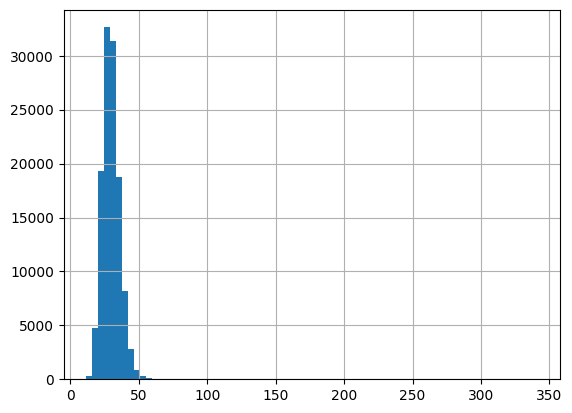

In [60]:
df['Est_vO2_Max'].hist(bins=75)

In [61]:
df['Est_vO2_Max'].describe()

count    119357.000000
mean         29.849081
std           6.400674
min          11.444400
25%          25.460395
50%          29.360341
75%          33.613636
max         340.971429
Name: Est_vO2_Max, dtype: float64

<Axes: >

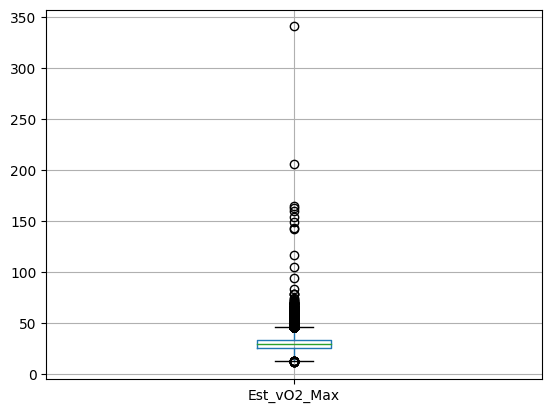

In [62]:
## there appears to be some unrelatistically high outliers:
df.boxplot('Est_vO2_Max')

In [63]:
p99=df['Est_vO2_Max'].quantile(0.99)
print(p99)

46.896096111465894


In [64]:
count =(df['Est_vO2_Max'] > 60).sum()
print (count)

78


In [65]:
p995=df['Est_vO2_Max'].quantile(0.995)
print(p995)

49.5854827586207


In [66]:
p999=df['Est_vO2_Max'].quantile(0.999)
print(p999)

57.20264281312807


In [67]:
count =(df['Est_vO2_Max'] > 50).sum()
print (count)

523


In [68]:
p50=df['Est_vO2_Max'].quantile(0.50)
print(p50)

29.36034115013389


In [69]:
##going to go back and just resest the values greater than 99.5 percentile to the mean
df.loc[df['Est_vO2_Max']>p995,'Est_vO2_Max']=p50

In [70]:
##Was using this cap in my initial model, later decided to simply reset these outliers to the mean
##df.loc[df['Est_vO2_Max']>p995,'Est_vO2_Max']=p995


In [71]:
df['Est_vO2_Max'].value_counts()

29.360341    599
29.849081    511
30.600000    511
38.250000    152
22.950000    119
            ... 
42.660000      1
29.195652      1
28.985612      1
37.262428      1
21.470465      1
Name: Est_vO2_Max, Length: 63989, dtype: int64

<Axes: >

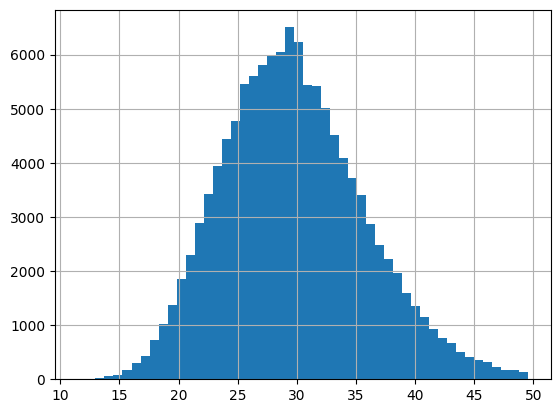

In [72]:
df['Est_vO2_Max'].hist(bins=50)

In [73]:
## Histogram looks much better.. but I may want to remove these outliers instead of cap them..concerned re: the peak at 49.585
## (I ended up removing the cap and just setting the values >995 percentile to the mean)
##Will need to get rid of outliers for other columns of interest (Pulse_Pressure, Lenght_Of_Stay, AGE_of_Patient... etc)

##Will first look at an initial logistic regression **bold text**

In [74]:
df['Est_vO2_Max'].value_counts()

29.360341    599
29.849081    511
30.600000    511
38.250000    152
22.950000    119
            ... 
42.660000      1
29.195652      1
28.985612      1
37.262428      1
21.470465      1
Name: Est_vO2_Max, Length: 63989, dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119357 entries, 0 to 119356
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   subject_id                119357 non-null  int64          
 1   AGE_patient               119357 non-null  int64          
 2   AVG_HR                    119357 non-null  float64        
 3   AVG_SBP                   119357 non-null  float64        
 4   AVG_DBP                   119357 non-null  float64        
 5   AVG_O2SAT                 119357 non-null  float64        
 6   AVG_BMI                   88346 non-null   float64        
 7   atime                     119357 non-null  datetime64[ns] 
 8   dtime                     119357 non-null  datetime64[ns] 
 9   inptdeath                 119357 non-null  int64          
 10  Date_of_Death             17676 non-null   datetime64[ns] 
 11  Max_HR                    119357 non-null  int64    

In [76]:
df.describe()

,subject_id,AGE_patient,AVG_HR,AVG_SBP,AVG_DBP,AVG_O2SAT,AVG_BMI,inptdeath,Max_HR,Pulse_Pressure,Est_vO2_Max,Length_of_Stay,Time_to_Outpatient_Death,Survival
count,1.193570e+05,119357.000000,119357.000000,119357.000000,119357.000000,119357.000000,88346.000000,119357.000000,119357.000000,119357.000000,119357.000000,119357,17676,119357.000000
mean,1.501336e+07,54.879974,80.746417,128.253461,74.471090,97.913155,33.368016,0.039646,153.120026,54.034398,29.713706,4 days 05:36:44.826193687,98 days 08:18:55.037338765,0.851906
std,2.888151e+06,20.220418,14.162578,17.260534,93.328806,2.769638,383.479599,0.195126,20.220418,94.156269,5.981087,6 days 14:38:54.676416964,216 days 18:41:20.077168744,0.355194
min,1.000003e+07,18.000000,7.000000,10.000000,6.000000,0.000000,0.000000,0.000000,117.000000,-25925.000000,11.444400,-1 days +01:21:00,-2172 days +06:30:00,0.000000
25%,1.250253e+07,38.000000,71.000000,116.166667,65.823529,97.000000,23.800000,0.000000,137.000000,45.090909,25.460395,0 days 22:48:00,-1 days +23:29:30,1.000000
50%,1.502683e+07,56.000000,79.571429,127.000000,72.750000,98.130435,27.400000,0.000000,152.000000,52.786517,29.360341,2 days 12:19:00,26 days 11:00:00,1.000000
75%,1.752118e+07,71.000000,89.000000,138.600000,80.000000,99.000000,32.000000,0.000000,170.000000,63.117647,33.513770,4 days 20:52:00,132 days 06:41:00,1.000000
max,1.999999e+07,91.000000,197.909091,293.000000,26028.500000,499.800000,107840.200000,1.000000,190.000000,221.000000,49.583333,234 days 01:00:00,3901 days 20:30:00,1.000000


In [77]:
# # repeat oulier process as above for other variables of interest and then begin modeling

## Let's Look Pulse_Pressure and AVG_02_Sat
## (O2 Sat references https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0244171,
## https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4342789/

In [78]:
df['Pulse_Pressure'].describe()

count    119357.000000
mean         54.034398
std          94.156269
min      -25925.000000
25%          45.090909
50%          52.786517
75%          63.117647
max         221.000000
Name: Pulse_Pressure, dtype: float64

<Axes: >

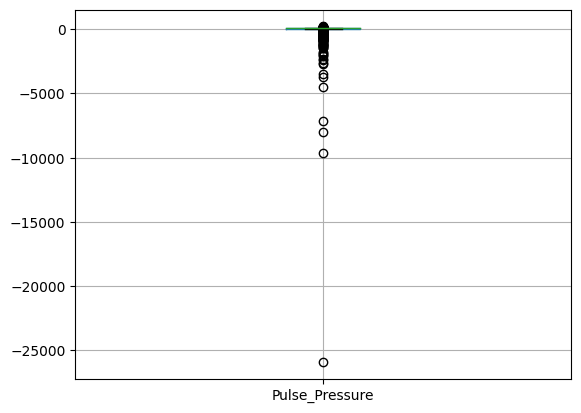

In [79]:
df.boxplot('Pulse_Pressure')

In [80]:
##Pulse pressure can obviously not be negative by definition
pp99925=df['Pulse_Pressure'].quantile(0.99925)
print(pp99925)

120.69792855458813


In [81]:
##Pulse pressure can obviously not be negative by definition
pp0025=df['Pulse_Pressure'].quantile(0.0025)
print(pp0025)

-28.522380974000015


In [82]:
pp50=df['Pulse_Pressure'].quantile(0.50)
print(pp50)

52.78651688000001


In [83]:
df.loc[df['Pulse_Pressure']>pp99925,'Pulse_Pressure']=pp50

In [84]:
pp004=df['Pulse_Pressure'].quantile(0.004)
print(pp004)

6.628266663840009


In [85]:
count =(df['Pulse_Pressure'] < pp004).sum()
print (count)

478


In [86]:
df.loc[df['Pulse_Pressure']<pp004,'Pulse_Pressure']=pp50

In [87]:
##count =(df['Pulse_Pressure'] > p99925).sum()
##print (count)

In [88]:
##df.loc[df['Pulse_Pressure']>p99925,'Pulse_Pressure']=p99925

In [89]:
df['Pulse_Pressure'].describe()

count    119357.000000
mean         55.469910
std          14.664496
min           6.666667
25%          45.250000
50%          52.786517
75%          63.011905
max         120.571429
Name: Pulse_Pressure, dtype: float64

<Axes: >

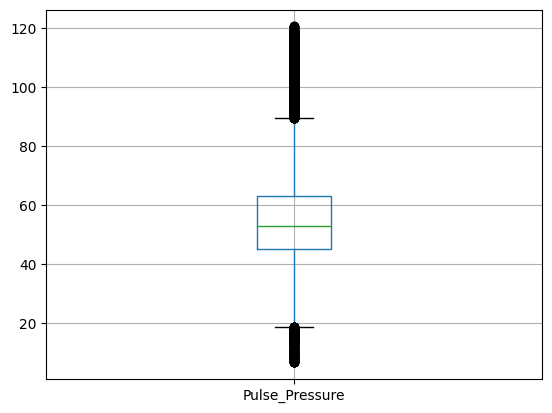

In [90]:
df.boxplot('Pulse_Pressure')

<Axes: >

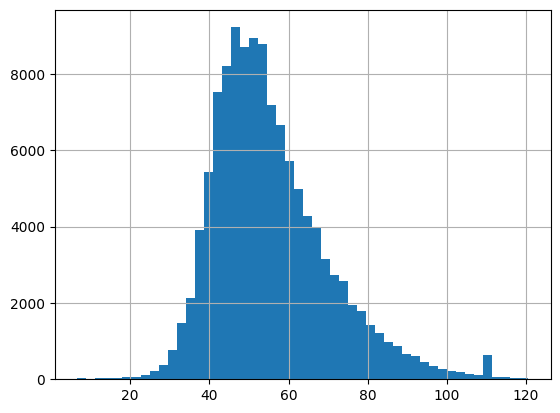

In [91]:
df['Pulse_Pressure'].hist(bins=50)

In [92]:
## seems a bit skewed, will set pp >> pp9925 = pp50
df.loc[df['Pulse_Pressure']>pp99925,'Pulse_Pressure']=pp50

In [93]:
df['Pulse_Pressure'].describe()

count    119357.000000
mean         55.469910
std          14.664496
min           6.666667
25%          45.250000
50%          52.786517
75%          63.011905
max         120.571429
Name: Pulse_Pressure, dtype: float64

<Axes: >

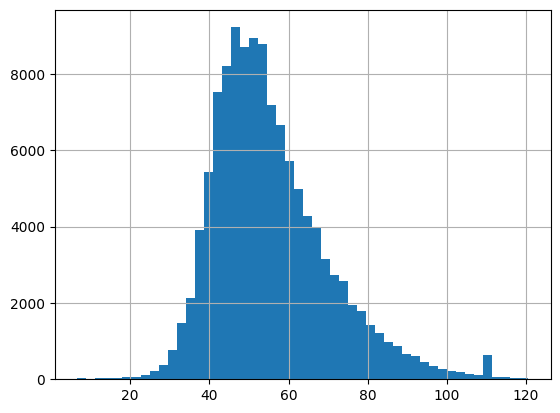

In [94]:
df['Pulse_Pressure'].hist(bins=50)

In [95]:
df['AVG_O2SAT'].describe()

count    119357.000000
mean         97.913155
std           2.769638
min           0.000000
25%          97.000000
50%          98.130435
75%          99.000000
max         499.800000
Name: AVG_O2SAT, dtype: float64

In [96]:
##OS Sat can not be greater than 100%
count =(df['AVG_O2SAT'] > 100).sum()
print (count)

24


In [97]:
p02s999=df['AVG_O2SAT'].quantile(0.999)
print(p02s999)

100.0


In [98]:
pO2s995=df['AVG_O2SAT'].quantile(0.995)
print(pO2s995)

100.0


In [99]:
count =(df['AVG_O2SAT'] > 99.9).sum()
print (count)

9853


In [100]:
count =(df['AVG_O2SAT'] < 80).sum()
print (count)

96


<Axes: >

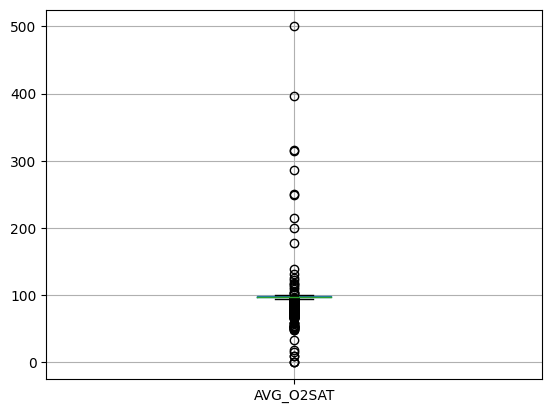

In [101]:
df.boxplot('AVG_O2SAT')

In [102]:
pO2s002=df['AVG_O2SAT'].quantile(0.002)
print(pO2s002)

87.60957142816


In [103]:
df.loc[df['AVG_O2SAT']>p02s999,'AVG_O2SAT']=p02s999

In [104]:
df.loc[df['AVG_O2SAT']<pO2s002,'AVG_O2SAT']=pO2s002

In [105]:
df['AVG_O2SAT'].describe()

count    119357.000000
mean         97.917987
std           1.612216
min          87.609571
25%          97.000000
50%          98.130435
75%          99.000000
max         100.000000
Name: AVG_O2SAT, dtype: float64

In [106]:
##For this notebook - I want to add AVG_BMI into the model before I Start Evaluating Logistic Regression Models,
## but there are > 31 thousand NA rows in "AVG_BMI" column.... I am going to simply drop these rows before modeling:

In [107]:
df2= df.dropna(subset=['AVG_BMI'])

In [108]:
df2['Survival'].value_counts()

1.0    75163
0.0    13183
Name: Survival, dtype: int64

In [109]:
## so, still 88,346 rows in df2... including  13,183 deaths... will move forward with
##regression model on this smaller dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88346 entries, 0 to 119356
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   subject_id                88346 non-null  int64          
 1   AGE_patient               88346 non-null  int64          
 2   AVG_HR                    88346 non-null  float64        
 3   AVG_SBP                   88346 non-null  float64        
 4   AVG_DBP                   88346 non-null  float64        
 5   AVG_O2SAT                 88346 non-null  float64        
 6   AVG_BMI                   88346 non-null  float64        
 7   atime                     88346 non-null  datetime64[ns] 
 8   dtime                     88346 non-null  datetime64[ns] 
 9   inptdeath                 88346 non-null  int64          
 10  Date_of_Death             13183 non-null  datetime64[ns] 
 11  Max_HR                    88346 non-null  int64          
 12  Pul

In [110]:
## BMI range from 16 severely underweight to 40+ severely obese
##(https://www.nhsinform.scot/healthy-living/food-and-nutrition/healthy-eating-and-weight-loss/body-mass-index-bmi/#
df2['AVG_BMI'].describe()

count     88346.000000
mean         33.368016
std         383.479599
min           0.000000
25%          23.800000
50%          27.400000
75%          32.000000
max      107840.200000
Name: AVG_BMI, dtype: float64

<Axes: >

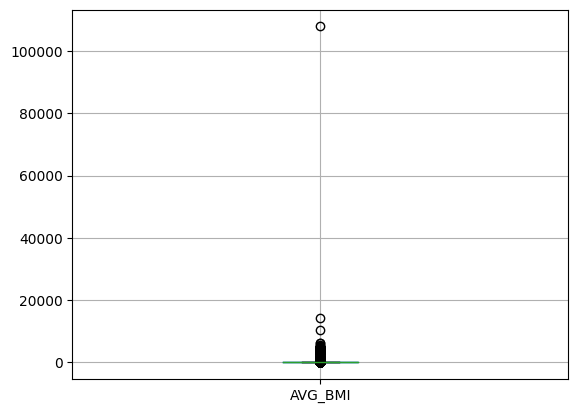

In [111]:
## still need to look at outliers in AVG_BMI column in df2... Max (107840) and Min (0) values are obviously incorrect
## NIH Tables for BMI stop at 55 (~ 6 foot tall person weighing 400 pounds) https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmi_tbl2.htm
df2.boxplot('AVG_BMI')

In [112]:
count =(df2['AVG_BMI'] > 55).sum()
print (count)

620


In [113]:
count =(df2['AVG_BMI'] > 60).sum()
print (count)

376


In [114]:
pbmi50=df2['AVG_BMI'].quantile(0.50)
print(pbmi50)

27.4


In [115]:
pbmi996=df['AVG_BMI'].quantile(0.996)
print(pbmi996)

60.70258333539998


In [116]:
df2.loc[df2['AVG_BMI']>pbmi996,'AVG_BMI']=pbmi50

In [117]:
df2['AVG_BMI'].describe()

count    88346.000000
mean        28.432219
std          6.712353
min          0.000000
25%         23.800000
50%         27.400000
75%         31.900000
max         60.700000
Name: AVG_BMI, dtype: float64

In [118]:
count =(df2['AVG_BMI'] < 14).sum()
print (count)

201


In [119]:
count =(df2['AVG_BMI'] < 15).sum()
print (count)

279


In [120]:
pbmi003=df2['AVG_BMI'].quantile(0.003)
print(pbmi003)

14.8


In [121]:
df2.loc[df2['AVG_BMI']<pbmi003,'AVG_BMI']=pbmi50

In [122]:
df2['AVG_BMI'].describe()

count    88346.000000
mean        28.481578
std          6.638902
min         14.800000
25%         23.840000
50%         27.400000
75%         31.900000
max         60.700000
Name: AVG_BMI, dtype: float64

In [123]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88346 entries, 0 to 119356
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   subject_id                88346 non-null  int64          
 1   AGE_patient               88346 non-null  int64          
 2   AVG_HR                    88346 non-null  float64        
 3   AVG_SBP                   88346 non-null  float64        
 4   AVG_DBP                   88346 non-null  float64        
 5   AVG_O2SAT                 88346 non-null  float64        
 6   AVG_BMI                   88346 non-null  float64        
 7   atime                     88346 non-null  datetime64[ns] 
 8   dtime                     88346 non-null  datetime64[ns] 
 9   inptdeath                 88346 non-null  int64          
 10  Date_of_Death             13183 non-null  datetime64[ns] 
 11  Max_HR                    88346 non-null  int64          
 12  Pul

In [124]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
subject_id,88346.0,15018219.746044,2886864.424344,10000032.0,12508720.25,15035590.0,17521559.25,19999828.0
AGE_patient,88346.0,56.098646,19.358011,18.0,41.0,58.0,71.0,91.0
AVG_HR,88346.0,80.576401,13.744785,7.0,71.0,79.5,88.85582,197.909091
AVG_SBP,88346.0,129.059311,17.016955,11.0,117.0,127.705882,139.333333,293.0
AVG_DBP,88346.0,74.83296,106.162225,6.0,66.0,72.928571,80.0,26028.5
AVG_O2SAT,88346.0,97.887411,1.581863,87.609571,97.0,98.083333,99.0,100.0
AVG_BMI,88346.0,28.481578,6.638902,14.8,23.84,27.4,31.9,60.7
inptdeath,88346.0,0.03458,0.182714,0.0,0.0,0.0,0.0,1.0
Max_HR,88346.0,151.901354,19.358011,117.0,137.0,150.0,167.0,190.0
Pulse_Pressure,88346.0,55.939944,14.440793,6.666667,45.720556,53.4,63.833333,120.571429


In [125]:
## Running this model with independant variable "Death"('0') led to	Extra Trees Classifier being the most accurate model 	(0.7599)... with O2_Sat as the most important model feature
## This may be because many patietns with very low 02_Sat values were in acute respiratory failure and died during that hospitilization.
## So - will remove inpatient deaths from the dataset and rerun model:

In [126]:
## Also I am really most interested in looking at these three CV parameters as markers for near term mortality
## (ie within one year of discharge, not immediate term)

In [130]:
df2['inptdeath'].value_counts()

0    85291
1     3055
Name: inptdeath, dtype: int64

In [132]:
print (df2[df2.inptdeath != 1])

        subject_id  AGE_patient      AVG_HR     AVG_SBP    AVG_DBP  \
0         17755225           18  114.000000  126.000000  86.000000   
3         14332783           18   74.000000  103.500000  62.250000   
5         19531581           18   95.000000  118.600000  80.200000   
6         12753584           18   95.230769  123.307692  68.846154   
7         17312526           18   71.117647  118.941176  65.176471   
...            ...          ...         ...         ...        ...   
119348    15735342           91   63.142857  142.714286  79.142857   
119351    10833322           91  101.000000  129.000000  91.000000   
119352    10582595           91  113.428571  160.000000  76.000000   
119353    18975602           91   87.400000  130.222222  64.666667   
119356    16100048           91   83.375000  127.250000  67.875000   

         AVG_O2SAT    AVG_BMI               atime               dtime  \
0       100.000000  21.450000 2154-02-23 17:24:00 2154-03-02 16:10:00   
3       100.0

In [133]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88346 entries, 0 to 119356
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   subject_id                88346 non-null  int64          
 1   AGE_patient               88346 non-null  int64          
 2   AVG_HR                    88346 non-null  float64        
 3   AVG_SBP                   88346 non-null  float64        
 4   AVG_DBP                   88346 non-null  float64        
 5   AVG_O2SAT                 88346 non-null  float64        
 6   AVG_BMI                   88346 non-null  float64        
 7   atime                     88346 non-null  datetime64[ns] 
 8   dtime                     88346 non-null  datetime64[ns] 
 9   inptdeath                 88346 non-null  int64          
 10  Date_of_Death             13183 non-null  datetime64[ns] 
 11  Max_HR                    88346 non-null  int64          
 12  Pul

In [134]:
df2 = df2[df2['inptdeath'] == 0]

In [135]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
subject_id,85291.0,15017652.817671,2885445.778757,10000032.0,12507087.0,15035611.0,17519203.5,19999828.0
AGE_patient,85291.0,55.637582,19.359207,18.0,40.0,57.0,70.0,91.0
AVG_HR,85291.0,80.343305,13.626534,7.0,71.0,79.25,88.5,197.909091
AVG_SBP,85291.0,129.236333,16.949078,11.0,117.333333,127.888889,139.5,293.0
AVG_DBP,85291.0,75.046422,107.93853,6.0,66.333333,73.0,80.107246,26028.5
AVG_O2SAT,85291.0,97.910962,1.568036,87.609571,97.0,98.125,99.0,100.0
AVG_BMI,85291.0,28.519936,6.645351,14.8,23.889087,27.4,31.922902,60.7
inptdeath,85291.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Max_HR,85291.0,152.362418,19.359207,117.0,138.0,151.0,168.0,190.0
Pulse_Pressure,85291.0,55.921357,14.399307,6.666667,45.75,53.371429,63.75,120.571429


In [136]:
df2['inptdeath'].value_counts()

0    85291
Name: inptdeath, dtype: int64

In [137]:
## This eliminated all of the patients that died during hospitilization... what are the target variable value counts now?
df2['Survival'].value_counts()

1.0    75163
0.0    10128
Name: Survival, dtype: int64

In [138]:
## Note : this remains a very imbalanced dataset Ratio of Survived ("1")/Death ("0") = 75153/10128 = 7.4:1
## 88.1% of patients = "Survived"/"1"... 11.9% = "Death"/"0"

In [140]:
## interested to see how removing these patients may have changed the patient age group splits:
## look at initial df (df) first

In [139]:
df['Age_Group'].value_counts()

5    21107
4    19929
6    16964
7    16927
1    16606
3    14149
2    13675
Name: Age_Group, dtype: int64

In [141]:
## Address unbalanced age groups
import plotly.express as px
fig = px.pie(df, values=df['Age_Group'].value_counts().values, names=df['Age_Group'].value_counts().index)
fig.update_traces(hoverinfo='label+percent', textinfo='percent')
fig.show()

In [143]:
## pateint population in original df skews older: Top 3... 17.7% Age group 5 (60-69)... 16.7% age group 4 (50-59)... 14.2% age group 6 (70-79).... Lowest is Age group 2 (30-39) at 11.5%
## compare with new df2 which contains only outpatient deaths

In [144]:
df2['Age_Group'].value_counts()

5    16203
4    14835
6    12873
7    11391
3    10312
2     9891
1     9786
Name: Age_Group, dtype: int64

In [145]:
## Address unbalanced age groups
import plotly.express as px

fig = px.pie(df2, values=df2['Age_Group'].value_counts().values, names=df2['Age_Group'].value_counts().index)
fig.update_traces(hoverinfo='label+percent', textinfo='percent')
fig.show()

In [146]:
## interestin that the dataset becomes even more skewed towards older age categories... perhaps younger patients that died in hosptial were trauma victims?
df2['Survival'].value_counts()

1.0    75163
0.0    10128
Name: Survival, dtype: int64

In [147]:
## Compare multiple models using Pycaret
## The dataset is unbalanced.  Target variable "Survival" has 10,138 category "0" and 75,163 category "1"... a ~ 7.4:1 ratio. Will install imblearn as well
## Also will attempt to balance using SMOTE

In [148]:
pip install PYCARET

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.4 MB/s et

In [149]:
pip install imblearn

In [150]:
#### NEW CODE LINE FROM ORIGINAL JUPYTER NOTEBOOK... ATTEMPT TO IMPORT PYCARET
##pip install pycaret

In [151]:
##Now will start evaluating models on this dataset that includes AVG_BMI
import pandas as pd
from matplotlib import pyplot
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

In [152]:
## look at a correlation matrix
CORREL = df2.corr().sort_values('Survival')

<ipython-input-152-67b5eb57e8c5>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<ipython-input-153-3fe8fcdd1e7f>:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

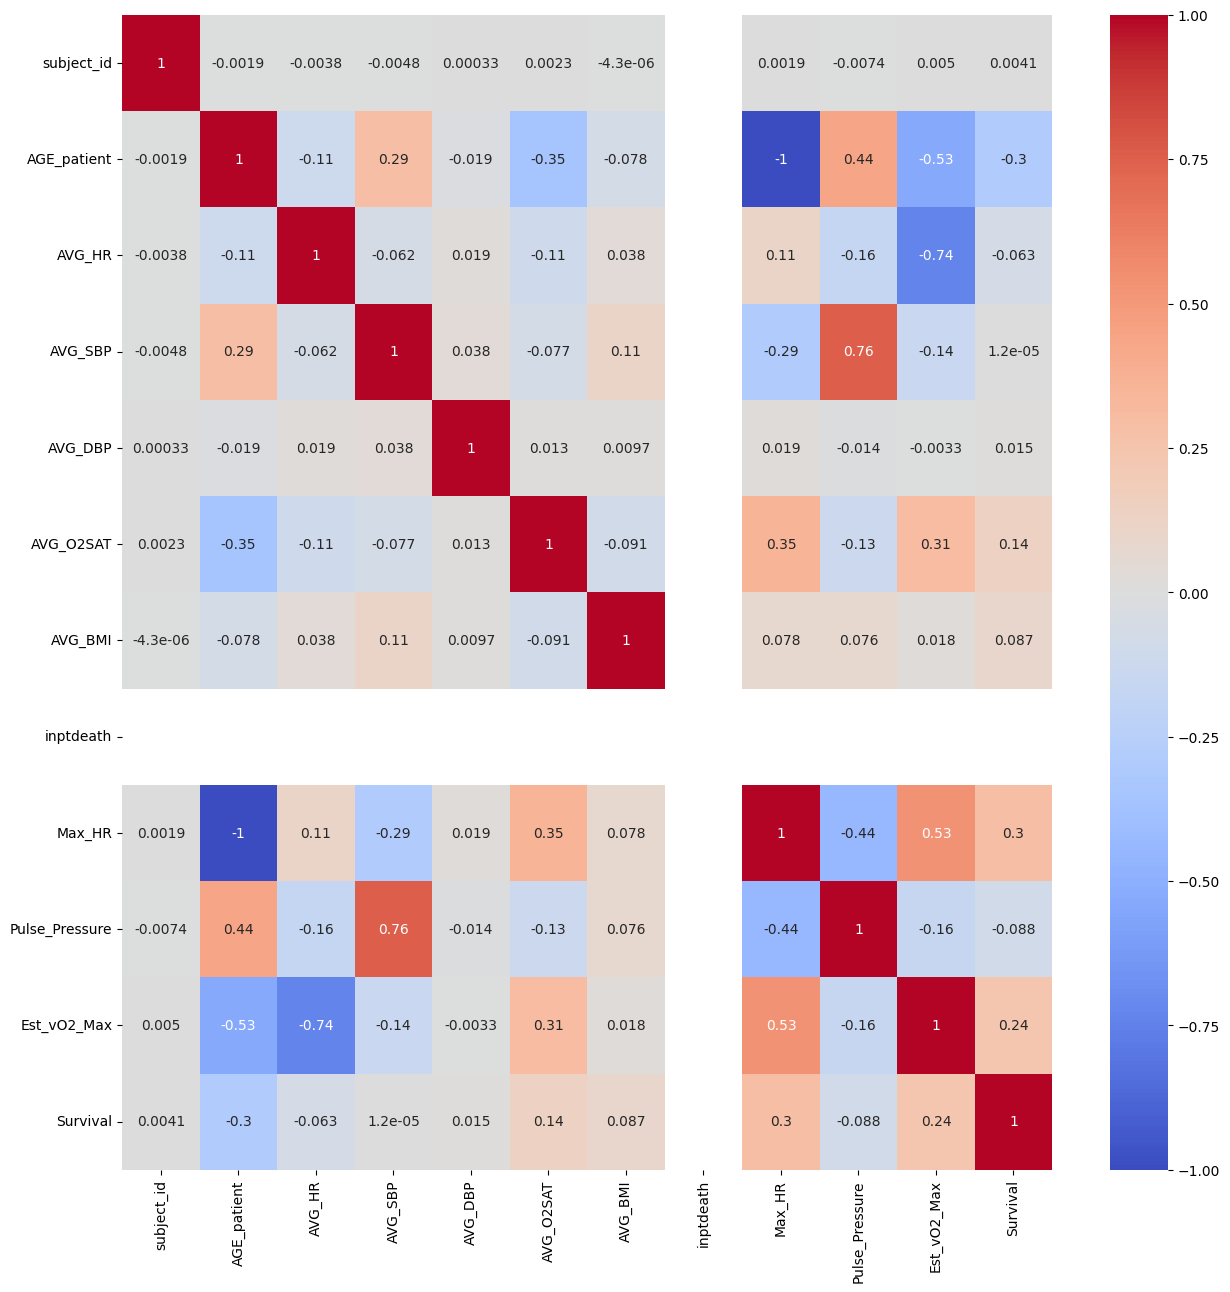

In [153]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap (df2.corr(), cmap="coolwarm",annot=True)

In [154]:
## AGE_Patient has high negative correlation as does inptdeath (which is included w/i "Survival" so should be ignored)
## EST_vO2_Max appears rlatively highly positively correlated as does AVG_O2SAT
##... Pulse_Pressure mildly negatively correlated
##will evaluate a logistic regression that includes three physio parameters
##of AVG_O2SAT, Pulse_Pressure and Estimated-vO2Max and also adding AVG_BMI

In [155]:
## Update 11_30_23: Attempt to go directly to pycaret and compare to modeling using SMOTE instead of setting up LR with SMOTE first

In [156]:
data = df2[['AVG_O2SAT','Pulse_Pressure','Est_vO2_Max','AVG_BMI','Survival']]

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85291 entries, 0 to 119356
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AVG_O2SAT       85291 non-null  float64
 1   Pulse_Pressure  85291 non-null  float64
 2   Est_vO2_Max     85291 non-null  float64
 3   AVG_BMI         85291 non-null  float64
 4   Survival        85291 non-null  float64
dtypes: float64(5)
memory usage: 3.9 MB


In [158]:
from pycaret.classification import *
s = setup(data, target = 'Survival')

,Description,Value
0,Session id,6274
1,Target,Survival
2,Target type,Binary
3,Original data shape,"(85291, 5)"
4,Transformed data shape,"(85291, 5)"
5,Transformed train set shape,"(59703, 5)"
6,Transformed test set shape,"(25588, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [159]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8812,0.0000,1.0000,0.8812,0.9369,0.0000,0.0000,0.0560
dummy,Dummy Classifier,0.8812,0.5000,1.0000,0.8812,0.9369,0.0000,0.0000,0.0470
gbc,Gradient Boosting Classifier,0.8809,0.7498,0.9988,0.8817,0.9366,0.0082,0.0340,6.6410
lda,Linear Discriminant Analysis,0.8807,0.7429,0.9984,0.8818,0.9365,0.0100,0.0390,0.0950
lightgbm,Light Gradient Boosting Machine,0.8807,0.7473,0.9989,0.8815,0.9365,0.0045,0.0217,1.8800
lr,Logistic Regression,0.8806,0.7403,0.9983,0.8818,0.9365,0.0100,0.0373,0.6890
ada,Ada Boost Classifier,0.8802,0.7432,0.9969,0.8824,0.9362,0.0194,0.0551,1.8620
xgboost,Extreme Gradient Boosting,0.8789,0.7310,0.9933,0.8837,0.9353,0.0379,0.0765,0.4560
rf,Random Forest Classifier,0.8761,0.7147,0.9895,0.8838,0.9337,0.0392,0.0680,12.5780
et,Extra Trees Classifier,0.8753,0.7098,0.9882,0.8840,0.9332,0.0416,0.0688,4.6130


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [160]:
##Again... the accuracy of these models are misleading because the dataset is so unblanced:
##Target variable "Survival" has 10,128 category "0" and 75,163 category "1"... a greater than 7:1 ratio.
## Will install imblearn as well
## The ratio of Category 1("Survival')/Category "0" + "1" ("Death" + "Survival") = (75,163)/(75,163 + 10,128) = 88.1%
## This ratio is essentailly the same as the Accuracy of the two most accurate models (Ridge Classifier and Dummy Classifier... both with Recall of ~ 1.000; meaning most accurate model simply predicts a "1"/"Survival" outcome 100 percent of the time)
## These models really add essentailly no value... basically best model simply predicts a "1"/"Survival" outcome in all cases
## Will install imblearn and attempt to balance dataset using SMOTE, then rerun pycaret ... also may be better to evaluate model using Kappa as opposse to Accuracy

In [161]:
## Trying to correct for unbalanced model
from imblearn.combine import *
smote = SMOTETomek()

In [163]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'Survival',fix_imbalance = True,
             fix_imbalance_method=smote)

,Description,Value
0,Session id,4720
1,Target,Survival
2,Target type,Binary
3,Original data shape,"(85291, 5)"
4,Transformed data shape,"(128112, 5)"
5,Transformed train set shape,"(102632, 5)"
6,Transformed test set shape,"(25588, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [164]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7814,0.7111,0.8358,0.9088,0.8708,0.1695,0.1759,10.0780
rf,Random Forest Classifier,0.7695,0.7085,0.8174,0.9120,0.8621,0.1740,0.1841,28.8560
dt,Decision Tree Classifier,0.7274,0.5805,0.7732,0.9036,0.8333,0.1099,0.1209,1.9190
xgboost,Extreme Gradient Boosting,0.7209,0.7265,0.7409,0.9279,0.8239,0.1902,0.2220,1.8770
lightgbm,Light Gradient Boosting Machine,0.7137,0.7408,0.7262,0.9343,0.8172,0.2022,0.2416,5.0540
gbc,Gradient Boosting Classifier,0.6863,0.7466,0.6867,0.9415,0.7942,0.1980,0.2499,16.4970
knn,K Neighbors Classifier,0.6857,0.6322,0.7130,0.9110,0.7999,0.1154,0.1369,1.6050
ada,Ada Boost Classifier,0.6773,0.7399,0.6758,0.9416,0.7868,0.1913,0.2446,4.7240
lr,Logistic Regression,0.6689,0.7439,0.6633,0.9445,0.7793,0.1911,0.2490,1.4930
lda,Linear Discriminant Analysis,0.6625,0.7439,0.6547,0.9455,0.7737,0.1884,0.2484,1.2210


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

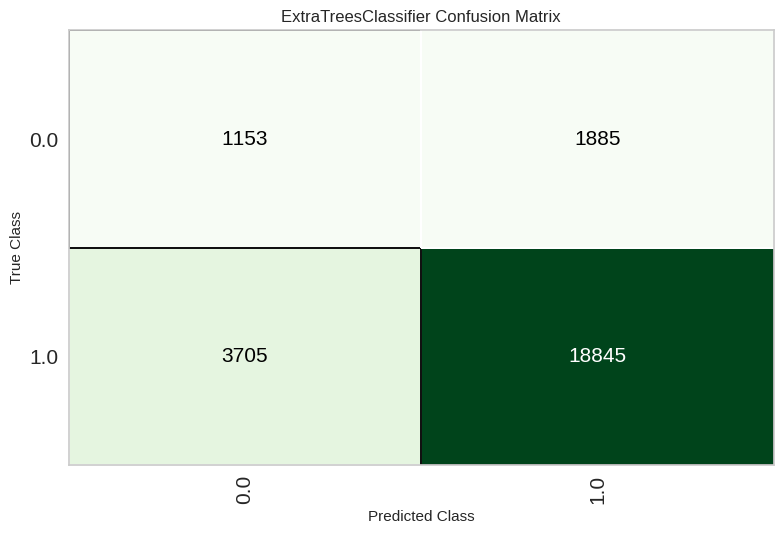

In [165]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

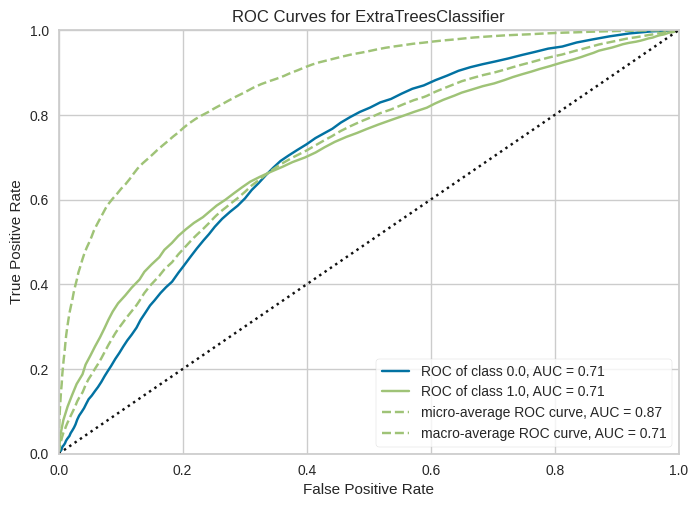

In [166]:
# plot AUC
plot_model(best, plot = 'auc')

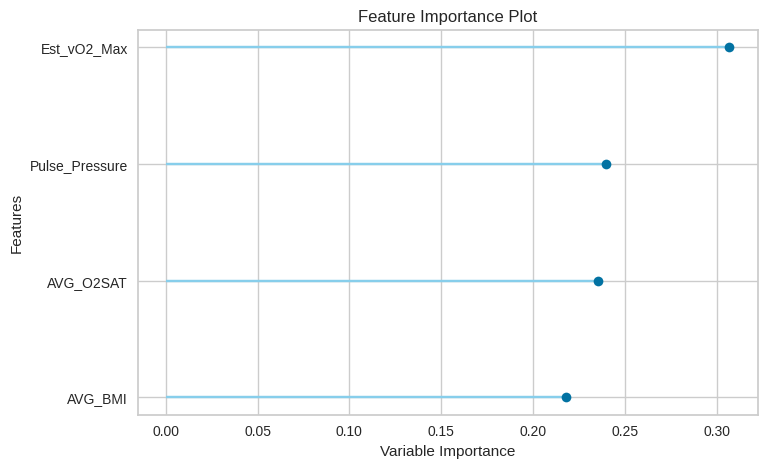

In [167]:
# plot feature importance
plot_model(best, plot = 'feature')

In [168]:
# prints the parameters of the best model
print(best.get_params())



{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 4720, 'verbose': 0, 'warm_start': False}


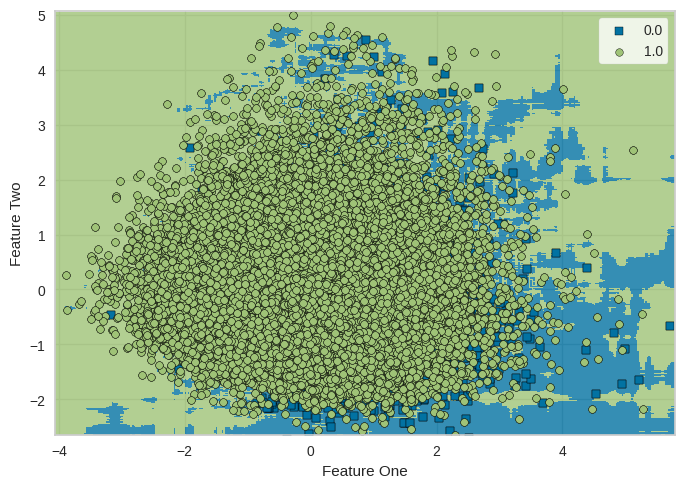

In [169]:
# make a boundary plot
plot_model(best, 'boundary')

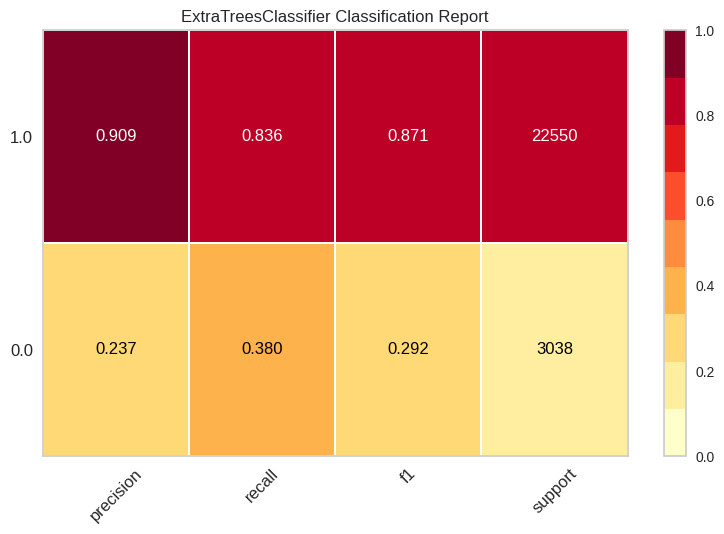

In [170]:
plot_model(best, plot='class_report', verbose=False)

In [171]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7815,0.7116,0.8357,0.9091,0.8708,0.1709,0.1775


In [172]:
# Select top N models (defaults only, without tuning)


# Then tune these N best models
tuned_models = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8813,0.5000,1.0000,0.8813,0.9369,0.0000,0.0000
1,0.8813,0.5000,1.0000,0.8813,0.9369,0.0000,0.0000
2,0.8813,0.5000,1.0000,0.8813,0.9369,0.0000,0.0000
3,0.8812,0.5000,1.0000,0.8812,0.9369,0.0000,0.0000
4,0.8812,0.5000,1.0000,0.8812,0.9369,0.0000,0.0000
5,0.8812,0.5000,1.0000,0.8812,0.9369,0.0000,0.0000
6,0.8812,0.5000,1.0000,0.8812,0.9369,0.0000,0.0000
7,0.8812,0.5000,1.0000,0.8812,0.9369,0.0000,0.0000
8,0.8812,0.5000,1.0000,0.8812,0.9369,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
## check this ... does not seem right

In [ ]:
#3 Previous Work:  Installing SMOTE and fixing imbalanced data in the actual dataset prior to running  PYCARET (similar results)

In [ ]:
##df_logreg = df2[['AVG_O2SAT','Pulse_Pressure','Est_vO2_Max','AVG_BMI','Survival']]

In [ ]:
##df_logreg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88346 entries, 0 to 119356
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AVG_O2SAT       88346 non-null  float64
 1   Pulse_Pressure  88346 non-null  float64
 2   Est_vO2_Max     88346 non-null  float64
 3   AVG_BMI         88346 non-null  float64
 4   Survival        88346 non-null  float64
dtypes: float64(5)
memory usage: 4.0 MB


<Axes: >

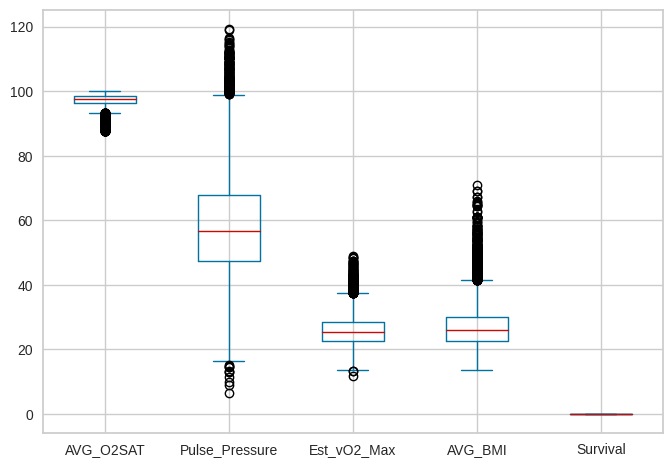

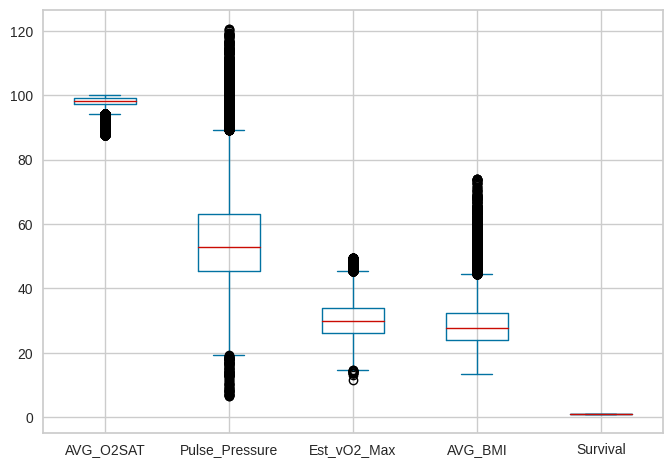

In [ ]:
## confirms we are using the correct variables in the smaller (n = 88,346) dataset df2
##df_logreg[df_logreg['Survival']==1].plot.box()   #survive
## df_logreg[df_logreg['Death']==0].plot.box()     #death

array([[<Axes: title={'center': 'AVG_O2SAT'}>,
        <Axes: title={'center': 'Pulse_Pressure'}>],
       [<Axes: title={'center': 'Est_vO2_Max'}>,
        <Axes: title={'center': 'AVG_BMI'}>],
       [<Axes: title={'center': 'Survival'}>, <Axes: >]], dtype=object)

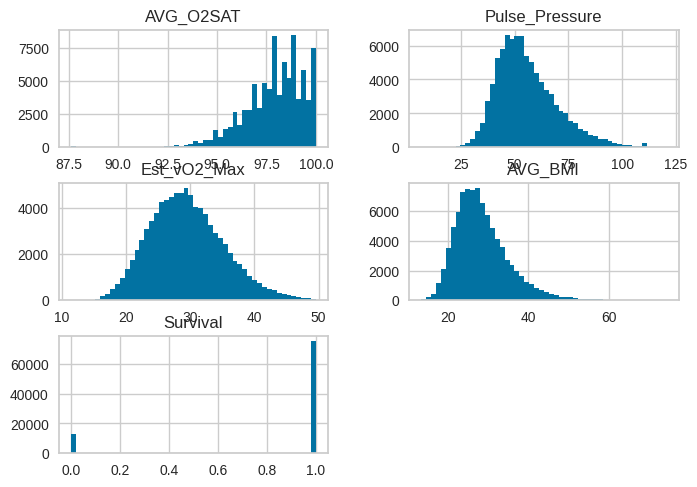

In [ ]:
##df_logreg.hist(bins=50)

In [ ]:
### Try Smote

In [ ]:
#train = df_logreg

In [ ]:
## will now look at logistic regression output using three physiologic parameters  + AVG_BMI

In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
#X_train, X_test,y_train, y_test = train_test_split(train.drop('Survival',axis =1),train['Survival'],test_size =0.25,shuffle=True)

In [ ]:
#from sklearn.linear_model import LogisticRegression

In [ ]:
## Trying to correct for unbalanced model
#from imblearn.combine import *

In [ ]:
#smote = SMOTETomek()
#X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

In [ ]:
#pd.Series(y_train_over).value_counts()

1.0    54791
0.0    54791
Name: Survival, dtype: int64

In [ ]:
#df = X_train_over
#df['Survival'] = y_train_over

In [ ]:
#data = df_logreg

In [ ]:
# import pycaret classification and init setup
#from pycaret.classification import *
#s = setup(data, target = 'Survival',fix_imbalance = True,
             fix_imbalance_method=smote)

,Description,Value
0,Session id,8282
1,Target,Survival
2,Target type,Binary
3,Original data shape,"(88346, 5)"
4,Transformed data shape,"(128934, 5)"
5,Transformed train set shape,"(102280, 5)"
6,Transformed test set shape,"(26504, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare baseline models
#best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7587,0.7214,0.8153,0.8918,0.8518,0.2091,0.2153,6.3540
rf,Random Forest Classifier,0.7481,0.7185,0.7977,0.8948,0.8434,0.2095,0.2189,18.1240
xgboost,Extreme Gradient Boosting,0.7104,0.7370,0.7285,0.9136,0.8106,0.2274,0.2561,1.0350
lightgbm,Light Gradient Boosting Machine,0.7060,0.7495,0.7177,0.9190,0.8059,0.2357,0.2694,3.5760
dt,Decision Tree Classifier,0.7055,0.5884,0.7554,0.8816,0.8136,0.1323,0.1418,1.1210
gbc,Gradient Boosting Classifier,0.6832,0.7526,0.6815,0.9268,0.7854,0.2310,0.2759,10.3660
ada,Ada Boost Classifier,0.6736,0.7437,0.6688,0.9274,0.7771,0.2236,0.2709,3.0000
lr,Logistic Regression,0.6725,0.7482,0.6649,0.9302,0.7755,0.2278,0.2778,1.1750
ridge,Ridge Classifier,0.6662,0.0000,0.6557,0.9317,0.7697,0.2250,0.2774,0.7000
lda,Linear Discriminant Analysis,0.6660,0.7482,0.6557,0.9314,0.7696,0.2243,0.2766,0.6790


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# compare baseline models
#best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7603,0.7194,0.8175,0.8917,0.8530,0.2102,0.2162,6.4400
rf,Random Forest Classifier,0.7500,0.7182,0.7989,0.8961,0.8447,0.2155,0.2251,18.5880
xgboost,Extreme Gradient Boosting,0.7142,0.7383,0.7338,0.9132,0.8137,0.2298,0.2573,1.0080
lightgbm,Light Gradient Boosting Machine,0.7120,0.7496,0.7258,0.9187,0.8109,0.2406,0.2728,3.4900
dt,Decision Tree Classifier,0.7053,0.5848,0.7565,0.8802,0.8137,0.1274,0.1363,1.1270
gbc,Gradient Boosting Classifier,0.6872,0.7530,0.6866,0.9268,0.7888,0.2345,0.2785,10.6380
ada,Ada Boost Classifier,0.6754,0.7438,0.6715,0.9268,0.7788,0.2240,0.2704,3.0240
lr,Logistic Regression,0.6703,0.7461,0.6628,0.9295,0.7738,0.2247,0.2744,1.4620
knn,K Neighbors Classifier,0.6672,0.6405,0.6935,0.8912,0.7800,0.1384,0.1586,1.3110
lda,Linear Discriminant Analysis,0.6656,0.7473,0.6557,0.9307,0.7694,0.2227,0.2744,0.7440


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
#pip install scipy

Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scipy-1.10.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-41284840.3.18.so
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/scipy/*
Proceed (Y/n)? Y
  Successfully uninstalled scipy-1.10.1


In [ ]:
#pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 12.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pycaret 3.2.0 requires scipy~=1.10.1, but you have scipy 1.11.4 which is incompatible.


In [ ]:
# plot confusion matrix
#plot_model(best, plot = 'confusion_matrix')

AttributeError: ignored

In [ ]:
##from sklearn import metrics
##from sklearn.metrics import classification_report

##from platform import python_version

##print(python_version())

3.10.12


In [ ]:
# predict on test set
#holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7611,0.7250,0.8145,0.8952,0.8530,0.2236,0.2308


In [ ]:
# plot feature importance
#plot_model(best, plot = 'feature')

AttributeError: ignored

In [ ]:
##DO NOT GO BELOW THIS LINE FOR THIS MODEL
## will repeat using a balanced dataset in this model... log_reg = LogisticRegression(class_weight = 'balanced')
## logmodel = LogisticRegression(class_weight = 'balanced')

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.40      0.03      0.06      3201
         1.0       0.86      0.99      0.92     18886

    accuracy                           0.85     22087
   macro avg       0.63      0.51      0.49     22087
weighted avg       0.79      0.85      0.80     22087



In [ ]:
from sklearn import metrics

In [ ]:
y_pred =logmodel.predict(X_test)

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[   99,  3102],
       [  146, 18740]])

Text(0.5, 489.55555555555554, 'Predicted label')

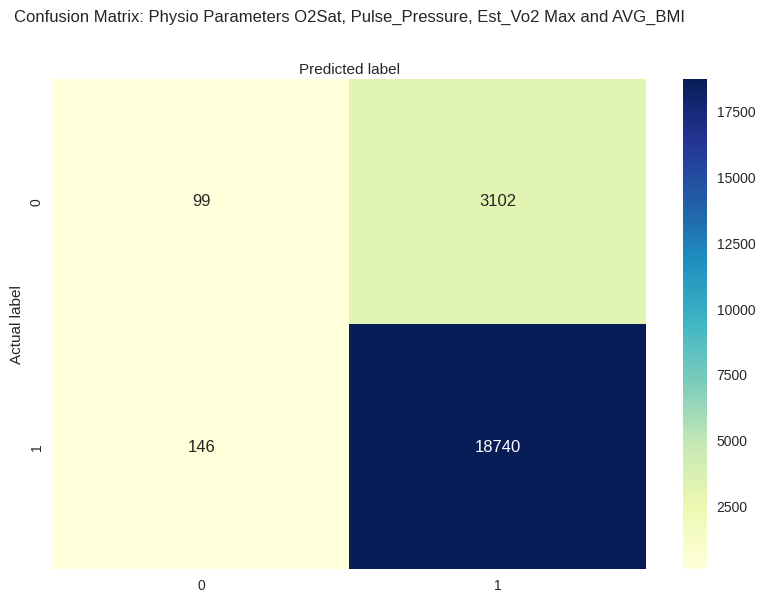

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix: Physio Parameters O2Sat, Pulse_Pressure, Est_Vo2 Max and AVG_BMI', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Death', 'Survival']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Death       0.40      0.03      0.06      3201
    Survival       0.86      0.99      0.92     18886

    accuracy                           0.85     22087
   macro avg       0.63      0.51      0.49     22087
weighted avg       0.79      0.85      0.80     22087



In [ ]:
logmodel.score(X_test, y_test)

0.8529451713677729

In [ ]:
### now look at pycaret ... already installed above

In [ ]:
# check installed version
import pycaret
pycaret.__version__

'3.2.0'

In [ ]:
##import pycaret
##pycaret.__version__

In [ ]:
data = df_logreg

In [ ]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'Survival')

,Description,Value
0,Session id,278
1,Target,Survival
2,Target type,Binary
3,Original data shape,"(88346, 5)"
4,Transformed data shape,"(88346, 5)"
5,Transformed train set shape,"(61842, 5)"
6,Transformed test set shape,"(26504, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [ ]:
from platform import python_version

print(python_version())

3.10.12


In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8512,0.7555,0.9946,0.8544,0.9192,0.0463,0.1036,5.7290
lightgbm,Light Gradient Boosting Machine,0.8512,0.7555,0.9944,0.8545,0.9192,0.0472,0.1041,1.2810
ridge,Ridge Classifier,0.8509,0.0000,0.9999,0.8509,0.9194,0.0021,0.0246,0.0460
dummy,Dummy Classifier,0.8508,0.5000,1.0000,0.8508,0.9194,0.0000,0.0000,0.0380
lda,Linear Discriminant Analysis,0.8499,0.7479,0.9939,0.8537,0.9185,0.0365,0.0826,0.1340
lr,Logistic Regression,0.8498,0.7461,0.9929,0.8543,0.9184,0.0438,0.0910,0.4820
ada,Ada Boost Classifier,0.8495,0.7474,0.9909,0.8551,0.9180,0.0540,0.1025,1.5860
xgboost,Extreme Gradient Boosting,0.8469,0.7408,0.9830,0.8578,0.9162,0.0822,0.1231,0.3750
rf,Random Forest Classifier,0.8438,0.7248,0.9764,0.8592,0.9140,0.0940,0.1269,11.3690
et,Extra Trees Classifier,0.8418,0.7196,0.9743,0.8588,0.9129,0.0887,0.1180,4.1820


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

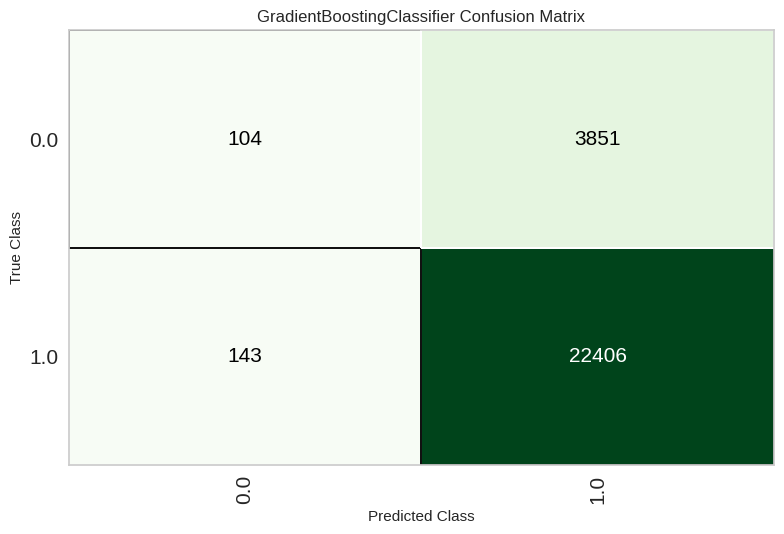

In [ ]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

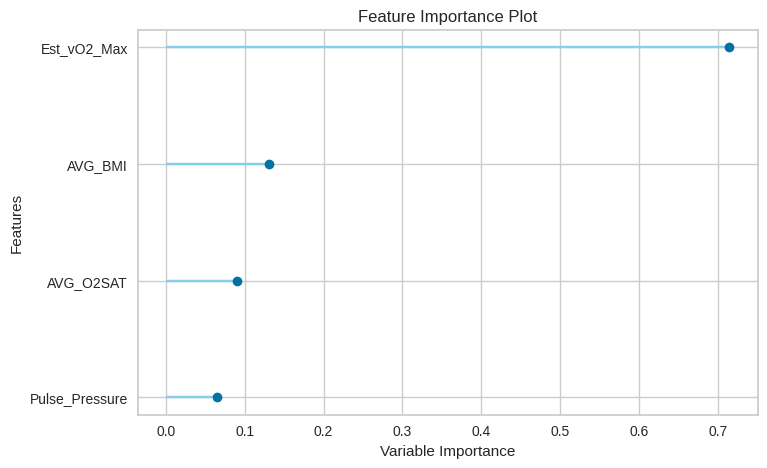

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
## PREDICTIONS

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8493,0.7525,0.9937,0.8533,0.9182,0.0325,0.0740


In [ ]:
# show predictions df
holdout_pred.head()

,AVG_O2SAT,Pulse_Pressure,Est_vO2_Max,AVG_BMI,Survival,prediction_label,prediction_score
80032,99.608696,103.120003,31.167006,27.500000,1.0,1,0.8716
3010,100.000000,78.000000,33.446510,21.900000,1.0,1,0.9088
42420,98.000000,48.000000,30.411112,26.914286,1.0,1,0.9282
80504,98.294868,59.922077,28.601316,30.618519,1.0,1,0.8986
118112,97.000000,62.000000,29.107317,28.450001,1.0,1,0.8714


In [ ]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('Survival', axis=1, inplace=True)
new_data.head()

,AVG_O2SAT,Pulse_Pressure,Est_vO2_Max,AVG_BMI
0,100.000000,40.000000,25.500000,21.450000
3,100.000000,41.250000,39.283784,23.914286
5,99.600000,38.400000,30.600000,25.250000
6,99.538462,54.461538,30.525848,41.125000
7,99.294118,53.764706,40.875931,36.090000


In [ ]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head(20)

,AVG_O2SAT,Pulse_Pressure,Est_vO2_Max,AVG_BMI,prediction_label,prediction_score
0,100.000000,40.000000,25.500000,21.450001,1,0.8470
3,100.000000,41.250000,39.283783,23.914286,1,0.9858
5,99.599998,38.400002,30.600000,25.250000,1,0.9479
6,99.538460,54.461540,30.525848,41.125000,1,0.9591
7,99.294121,53.764706,40.875931,36.090000,1,0.9819
8,97.857140,51.636364,37.531689,37.631580,1,0.9600
10,98.428574,65.333336,32.146919,27.900000,1,0.9183
11,99.714287,49.866665,31.347952,26.600000,1,0.9584
12,99.130432,49.000000,36.436512,18.590698,1,0.9684
13,99.000000,46.000000,33.034092,24.200001,1,0.9549


In [ ]:
## rerun models on this dataset with BMI after removing all inpatient deaths from the dataset

In [ ]:
df2['Survival'].value_counts()

1.0    75163
0.0    13183
Name: Survival, dtype: int64

In [ ]:
## Now I want to remove all of the inpatient deaths ... I suspect including those in my previous two notebooks
##could have been confounding the model. Also I am really interested in
##looking at these three CV parameters as markers for near term mortality
## (ie within one year of discharge, not immediate term)

In [ ]:
df2['inptdeath'].value_counts()

0    85291
1     3055
Name: inptdeath, dtype: int64

In [ ]:
print (df2[df2.inptdeath != 1])

        subject_id  AGE_patient      AVG_HR     AVG_SBP    AVG_DBP  \
0         17755225           18  114.000000  126.000000  86.000000   
3         14332783           18   74.000000  103.500000  62.250000   
5         19531581           18   95.000000  118.600000  80.200000   
6         12753584           18   95.230769  123.307692  68.846154   
7         17312526           18   71.117647  118.941176  65.176471   
...            ...          ...         ...         ...        ...   
119348    15735342           91   63.142857  142.714286  79.142857   
119351    10833322           91  101.000000  129.000000  91.000000   
119352    10582595           91  113.428571  160.000000  76.000000   
119353    18975602           91   87.400000  130.222222  64.666667   
119356    16100048           91   83.375000  127.250000  67.875000   

         AVG_O2SAT    AVG_BMI               atime               dtime  \
0       100.000000  21.450000 2154-02-23 17:24:00 2154-03-02 16:10:00   
3       100.0

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88346 entries, 0 to 119356
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   subject_id                88346 non-null  int64          
 1   AGE_patient               88346 non-null  int64          
 2   AVG_HR                    88346 non-null  float64        
 3   AVG_SBP                   88346 non-null  float64        
 4   AVG_DBP                   88346 non-null  float64        
 5   AVG_O2SAT                 88346 non-null  float64        
 6   AVG_BMI                   88346 non-null  float64        
 7   atime                     88346 non-null  datetime64[ns] 
 8   dtime                     88346 non-null  datetime64[ns] 
 9   inptdeath                 88346 non-null  int64          
 10  Date_of_Death             13183 non-null  datetime64[ns] 
 11  Max_HR                    88346 non-null  int64          
 12  Pul

In [ ]:
df3 = df2[df2['inptdeath'] == 0]

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85291 entries, 0 to 119356
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   subject_id                85291 non-null  int64          
 1   AGE_patient               85291 non-null  int64          
 2   AVG_HR                    85291 non-null  float64        
 3   AVG_SBP                   85291 non-null  float64        
 4   AVG_DBP                   85291 non-null  float64        
 5   AVG_O2SAT                 85291 non-null  float64        
 6   AVG_BMI                   85291 non-null  float64        
 7   atime                     85291 non-null  datetime64[ns] 
 8   dtime                     85291 non-null  datetime64[ns] 
 9   inptdeath                 85291 non-null  int64          
 10  Date_of_Death             10128 non-null  datetime64[ns] 
 11  Max_HR                    85291 non-null  int64          
 12  Pul

In [ ]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
subject_id,85291.0,15017652.817671,2885445.778757,10000032.0,12507087.0,15035611.0,17519203.5,19999828.0
AGE_patient,85291.0,55.637582,19.359207,18.0,40.0,57.0,70.0,91.0
AVG_HR,85291.0,80.343305,13.626534,7.0,71.0,79.25,88.5,197.909091
AVG_SBP,85291.0,129.236333,16.949078,11.0,117.333333,127.888889,139.5,293.0
AVG_DBP,85291.0,75.046422,107.93853,6.0,66.333333,73.0,80.107246,26028.5
AVG_O2SAT,85291.0,97.910962,1.568036,87.609571,97.0,98.125,99.0,100.0
AVG_BMI,85291.0,28.582775,6.864484,13.5,23.866312,27.4,31.98,74.1
inptdeath,85291.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Max_HR,85291.0,152.362418,19.359207,117.0,138.0,151.0,168.0,190.0
Pulse_Pressure,85291.0,56.032912,14.241252,26.0,45.875,53.371429,63.75,120.571429


In [ ]:
df3['inptdeath'].value_counts()

0    85291
Name: inptdeath, dtype: int64

In [ ]:
## This eliminated all of the patients that died during hospitilization... what are the target variable value counts now?
df3['Survival'].value_counts()

1.0    75163
0.0    10128
Name: Survival, dtype: int64

In [ ]:
## Will run LR using this new dataset with inpatient deaths eliminated

In [ ]:
##Now will start evaluating models on this dataset focusing on three CV parameters
import pandas as pd
from matplotlib import pyplot
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

In [ ]:
## look at a correlation matrix
CORREL = df3.corr().sort_values('Survival')

<Axes: >

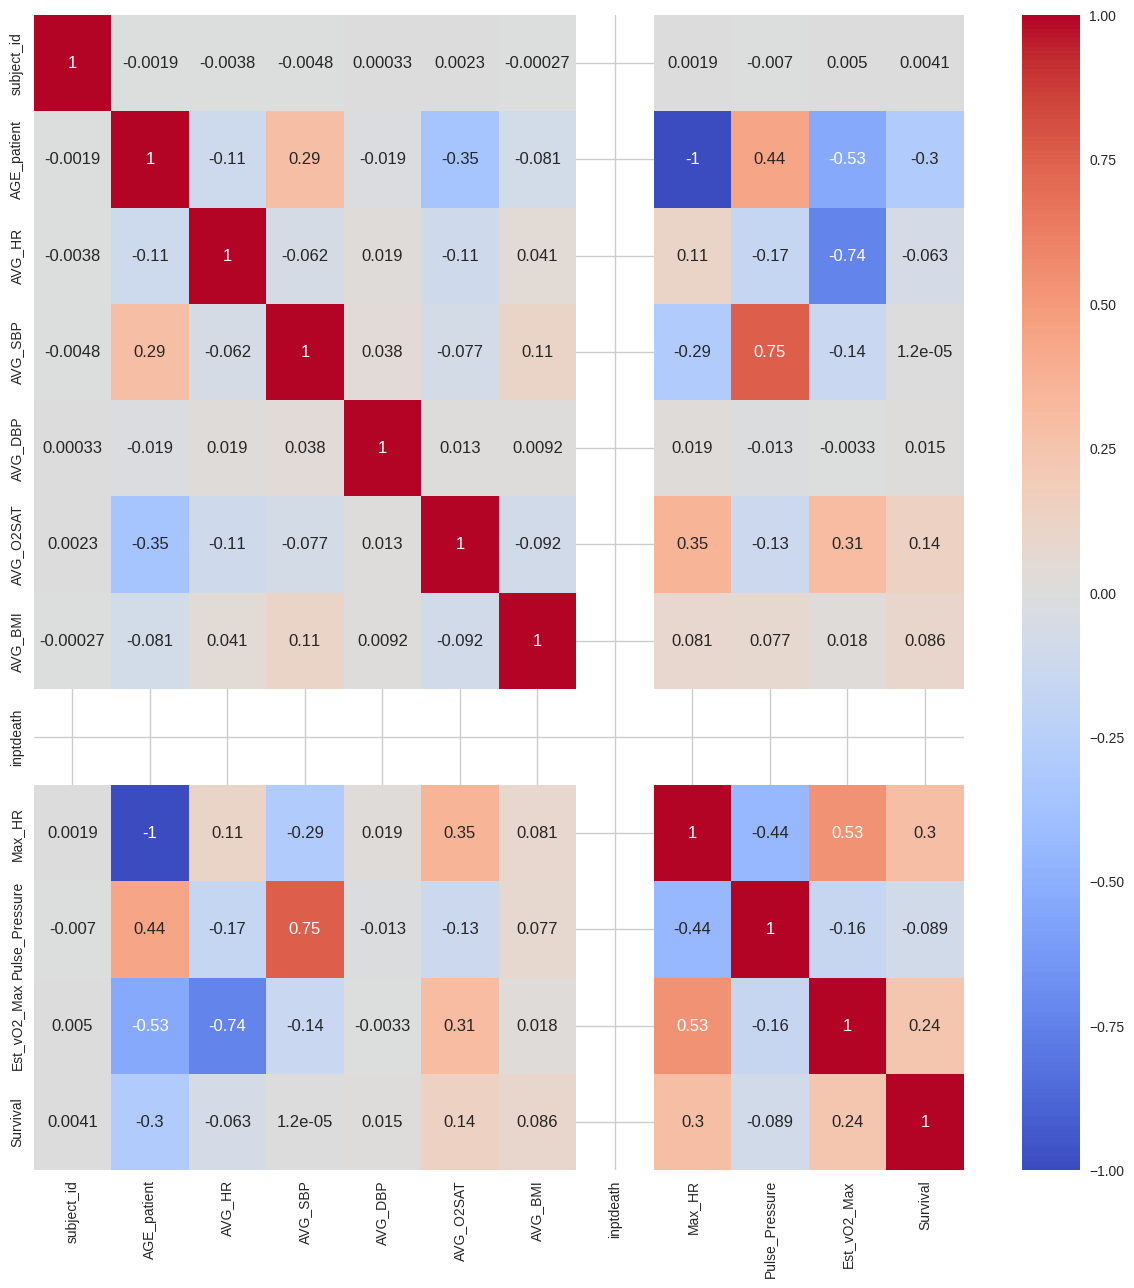

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap (df3.corr(), cmap="coolwarm",annot=True)

In [ ]:
df3_logreg = df3[['AVG_O2SAT','Pulse_Pressure','Est_vO2_Max','AVG_BMI','Survival']]

In [ ]:
df3_logreg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85291 entries, 0 to 119356
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AVG_O2SAT       85291 non-null  float64
 1   Pulse_Pressure  85291 non-null  float64
 2   Est_vO2_Max     85291 non-null  float64
 3   AVG_BMI         85291 non-null  float64
 4   Survival        85291 non-null  float64
dtypes: float64(5)
memory usage: 3.9 MB


<Axes: >

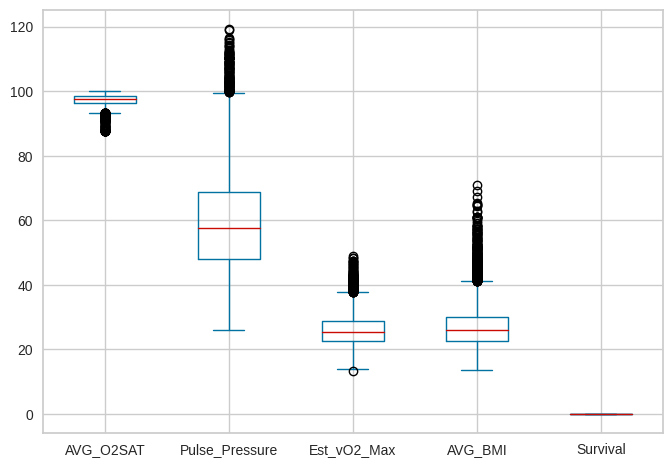

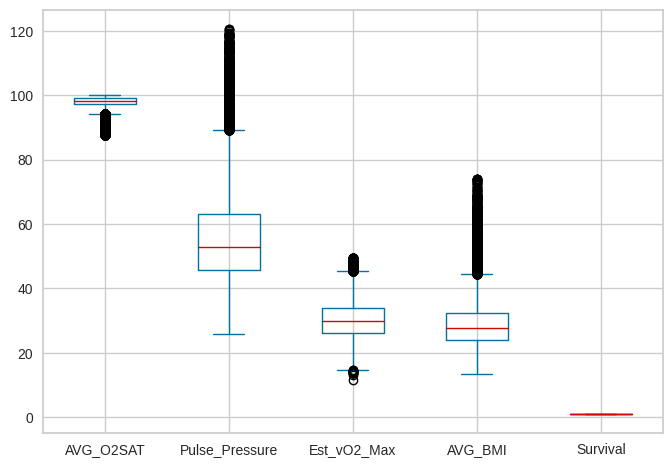

In [ ]:
## confirms we are using the correct variables in df
df3_logreg[df3_logreg['Survival']==0].plot.box()   #death
df3_logreg[df3_logreg['Survival']==1].plot.box()   #survive

array([[<Axes: title={'center': 'AVG_O2SAT'}>,
        <Axes: title={'center': 'Pulse_Pressure'}>],
       [<Axes: title={'center': 'Est_vO2_Max'}>,
        <Axes: title={'center': 'AVG_BMI'}>],
       [<Axes: title={'center': 'Survival'}>, <Axes: >]], dtype=object)

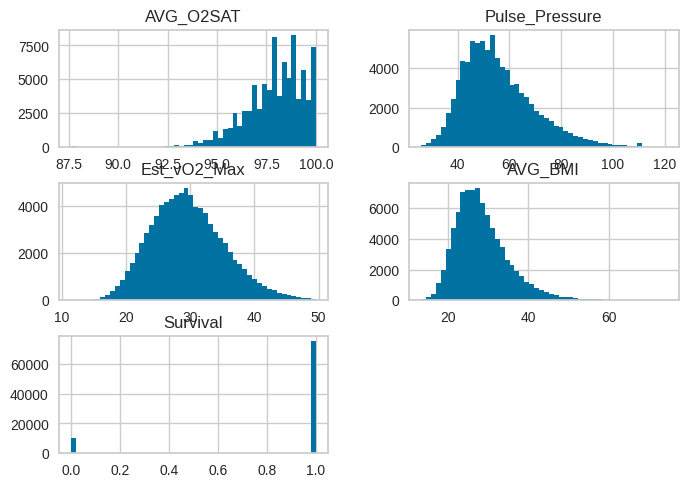

In [ ]:
df3_logreg.hist(bins=50)

In [ ]:
train = df3_logreg

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(train.drop('Survival',axis =1),train['Survival'],test_size =0.25,shuffle=True)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.35      0.00      0.01      2542
         1.0       0.88      1.00      0.94     18781

    accuracy                           0.88     21323
   macro avg       0.62      0.50      0.47     21323
weighted avg       0.82      0.88      0.83     21323



In [ ]:
from sklearn import metrics

In [ ]:
y_pred =logmodel.predict(X_test)

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[    7,  2535],
       [   13, 18768]])

Text(0.5, 489.55555555555554, 'Predicted label')

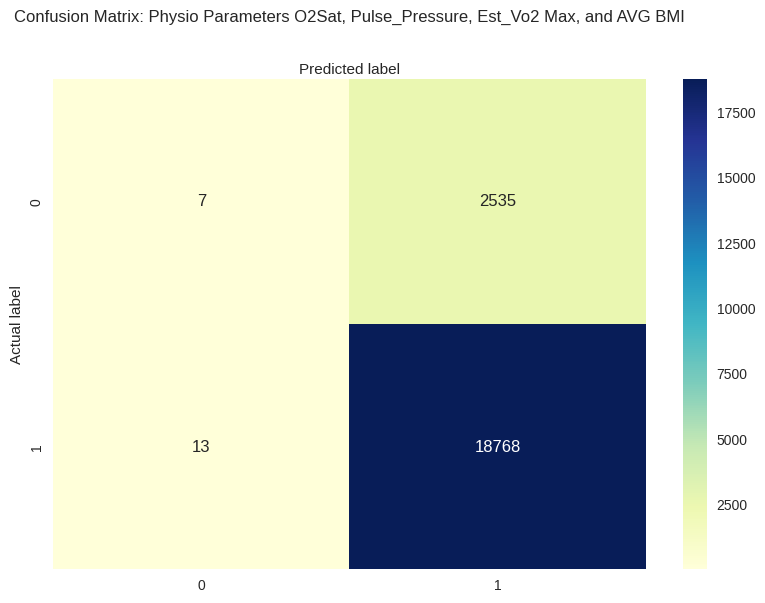

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix: Physio Parameters O2Sat, Pulse_Pressure, Est_Vo2 Max, and AVG BMI', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Death', 'Survival']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Death       0.35      0.00      0.01      2542
    Survival       0.88      1.00      0.94     18781

    accuracy                           0.88     21323
   macro avg       0.62      0.50      0.47     21323
weighted avg       0.82      0.88      0.83     21323



In [ ]:
logmodel.score(X_test, y_test)

0.880504619425034

In [ ]:
# check installed version
import pycaret
pycaret.__version__

'3.2.0'

In [ ]:
data = df3_logreg

In [ ]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'Survival')

,Description,Value
0,Session id,2142
1,Target,Survival
2,Target type,Binary
3,Original data shape,"(85291, 5)"
4,Transformed data shape,"(85291, 5)"
5,Transformed train set shape,"(59703, 5)"
6,Transformed test set shape,"(25588, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8812,0.0000,1.0000,0.8812,0.9369,0.0000,0.0000,0.0640
dummy,Dummy Classifier,0.8812,0.5000,1.0000,0.8812,0.9369,0.0000,0.0000,0.0380
gbc,Gradient Boosting Classifier,0.8811,0.7496,0.9990,0.8818,0.9368,0.0098,0.0450,5.4870
lightgbm,Light Gradient Boosting Machine,0.8808,0.7481,0.9984,0.8819,0.9365,0.0107,0.0411,1.8640
lr,Logistic Regression,0.8806,0.7398,0.9983,0.8819,0.9365,0.0104,0.0395,0.7730
ada,Ada Boost Classifier,0.8805,0.7434,0.9974,0.8823,0.9363,0.0174,0.0526,1.5360
lda,Linear Discriminant Analysis,0.8805,0.7425,0.9982,0.8818,0.9364,0.0098,0.0365,0.0780
xgboost,Extreme Gradient Boosting,0.8780,0.7304,0.9924,0.8835,0.9348,0.0354,0.0687,0.5980
rf,Random Forest Classifier,0.8759,0.7164,0.9890,0.8840,0.9335,0.0419,0.0713,10.2910
et,Extra Trees Classifier,0.8745,0.7113,0.9877,0.8836,0.9328,0.0356,0.0591,4.0500


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

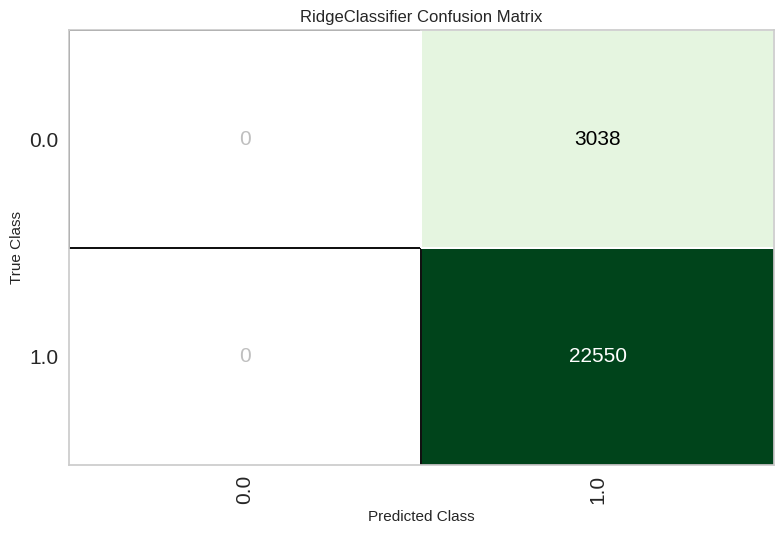

In [ ]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

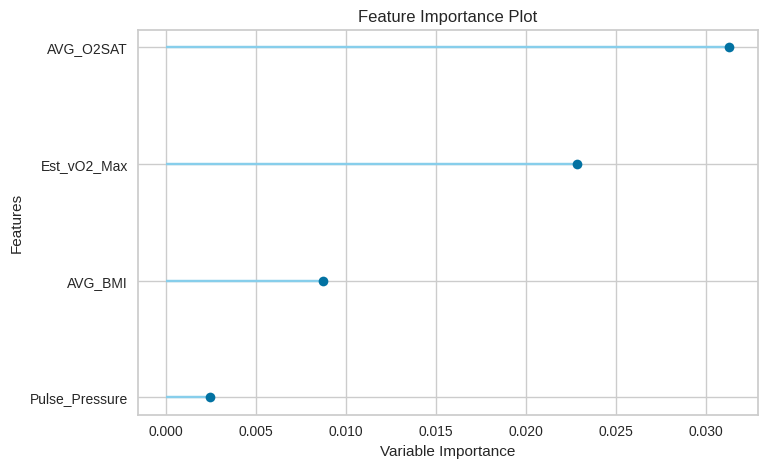

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
## Prediction

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8813,0.5000,1.0000,0.8813,0.9369,0.0000,0.0000


In [ ]:
# show predictions df
holdout_pred.head()

,AVG_O2SAT,Pulse_Pressure,Est_vO2_Max,AVG_BMI,Survival,prediction_label
87249,97.666664,52.000000,24.729071,32.733334,1.0,1
32940,97.375000,42.625000,29.753712,23.557896,1.0,1
29990,96.666664,58.333332,28.900000,18.500000,1.0,1
89771,97.000000,87.857140,29.054852,38.020000,1.0,1
21419,98.846153,45.769230,35.146988,27.630770,1.0,1


In [ ]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('Survival', axis=1, inplace=True)
new_data.head()

,AVG_O2SAT,Pulse_Pressure,Est_vO2_Max,AVG_BMI
0,100.000000,40.000000,25.500000,21.450000
3,100.000000,41.250000,39.283784,23.914286
5,99.600000,38.400000,30.600000,25.250000
6,99.538462,54.461538,30.525848,41.125000
7,99.294118,53.764706,40.875931,36.090000


In [ ]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head(20)

,AVG_O2SAT,Pulse_Pressure,Est_vO2_Max,AVG_BMI,prediction_label
0,100.000000,40.000000,25.500000,21.450001,1
3,100.000000,41.250000,39.283783,23.914286,1
5,99.599998,38.400002,30.600000,25.250000,1
6,99.538460,54.461540,30.525848,41.125000,1
7,99.294121,53.764706,40.875931,36.090000,1
8,97.857140,51.636364,37.531689,37.631580,1
10,98.428574,65.333336,32.146919,27.900000,1
11,99.714287,49.866665,31.347952,26.600000,1
12,99.130432,49.000000,36.436512,18.590698,1
13,99.000000,46.000000,33.034092,24.200001,1


In [ ]:
##does it make sense to look at non-linear SVC....?

In [ ]:
##ADDITIONAL DATA EVALUATION USING ENSEMBLE/VOTING:
## Since logistic regression has resulted in only a ..85299 accuracy score, , I decided to evaluate the dataset further
### using Decision tree and 5-NN methods, and then ensembling/majority voting methods using LR, 5-NN and Decision Tree.

In [ ]:
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score, completeness_score, homogeneity_score
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.datasets import make_gaussian_quantiles
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier

from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import GenericUnivariateSelect

In [ ]:
#I am going to try ensembling/majority voting classifiers to see if I can increase the accuracy score:

## Check results of applying k-nn on the data.
classifiers = [LogisticRegression(solver='liblinear', multi_class='auto'), KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier()]
names = ["LR", "5-NN", "DecisionTree"]

#Like in class - I next add some options.
#Next voting among all 3 model types
classifiers.append( VotingClassifier([ (type(x).__name__, x) for x in classifiers ]) )
names.append("Vote(LR,5-NN,DT)")

classifiers.append( VotingClassifier([ (x, LogisticRegression(solver='liblinear', multi_class='auto') ) for x in "abc"  ]) )
names.append("Vote(LRx3)")

classifiers.append( VotingClassifier([ (str(x), KNeighborsClassifier() ) for x in range(3) ]) )
names.append("Vote(5-NNx3)")

print(classifiers)

[LogisticRegression(solver='liblinear'), KNeighborsClassifier(), DecisionTreeClassifier(), VotingClassifier(estimators=[('LogisticRegression',
                              LogisticRegression(solver='liblinear')),
                             ('KNeighborsClassifier', KNeighborsClassifier()),
                             ('DecisionTreeClassifier',
                              DecisionTreeClassifier())]), VotingClassifier(estimators=[('a', LogisticRegression(solver='liblinear')),
                             ('b', LogisticRegression(solver='liblinear')),
                             ('c', LogisticRegression(solver='liblinear'))]), VotingClassifier(estimators=[('0', KNeighborsClassifier()),
                             ('1', KNeighborsClassifier()),
                             ('2', KNeighborsClassifier())])]


In [ ]:
## Now I am going to check the accuracy scores of the classifiers above on the second data frame
##(df2 = O2_Sat, Pulse_Pressure, Est_Vo2_Max )

print("df2", ":")
for model, m_name in zip(classifiers, names):
    model.fit(X_train, y_train)
    print("\t", m_name, accuracy_score(y_test, model.predict(X_test)))

df2 :
	 LR 0.8552089464390819
	 5-NN 0.8320731652103047
	 DecisionTree 0.7700457282564405
	 Vote(LR,5-NN,DT) 0.846878254176665
	 Vote(LRx3) 0.8552089464390819
	 Vote(5-NNx3) 0.8320731652103047


In [ ]:
# The Decision Tree method didn't outperform the LR in general for this dataset.
##But I am still going to check accuracy of using Random Forest Classifier:
## which is actually an intrinsic  method of feature selection; decorrelating the decision trees
## and then see if we can at least determine the most important features in the model

model = RandomForestClassifier(n_estimators=100, oob_score=True)
model.fit(X_train, y_train)
print("accuracy:", accuracy_score(y_test, model.predict(X_test)))
print("\n feature importances:", model.feature_importances_)
print("\n sum of feature importances:", sum(model.feature_importances_) )
print("\n", X_train, "\n")
feat_labels = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print(f + 1,")", feat_labels[indices[f]], importances[indices[f]])

accuracy: 0.8447050301082084

 feature importances: [0.20112838 0.23409603 0.32064345 0.24413214]

 sum of feature importances: 1.0

         AVG_O2SAT  Pulse_Pressure  Est_vO2_Max    AVG_BMI
116754  95.942857       51.028571    20.569107  21.400000
62780   97.000000      102.000000    33.503650  23.400000
117408  95.000000       60.000000    19.457609  28.900000
89735   96.980000       76.000000    29.873159  28.891892
91287   98.333333       84.933333    30.720472  29.840000
...           ...             ...          ...        ...
97661   96.571429       69.500000    26.575187  27.941667
98548   97.000000       40.400000    21.037500  27.560000
21257   99.333333       53.666667    23.690323  36.533333
39810   99.500000       41.875000    35.856781  31.900000
78978   97.166667       74.833333    28.414286  26.113158

[66259 rows x 4 columns] 

1 ) Est_vO2_Max 0.3206434532366884
2 ) AVG_BMI 0.24413213628336672
3 ) Pulse_Pressure 0.2340960288827832
4 ) AVG_O2SAT 0.2011283815971618


In [ ]:
## Note that once again Est_Vo2_Max is most important feature... AVG_O2_Sat is the least... AVG_BMI approximately
## equal to Pulse_Pressure

In [ ]:
## I am going to go bakc and repeat these steps using a balanced LR model since the Survival outcomes are so unblanced:
## "1" - or "Survive" = 75,163... while 0 - or "Death" = 13,183

In [ ]:
logmodel = LogisticRegression(class_weight = 'balanced')

In [ ]:
logmodel.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.26      0.71      0.38      3187
         1.0       0.93      0.66      0.77     18900

    accuracy                           0.67     22087
   macro avg       0.60      0.68      0.58     22087
weighted avg       0.83      0.67      0.72     22087



In [ ]:
from sklearn import metrics

In [ ]:
y_pred =logmodel.predict(X_test)

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 2258,   929],
       [ 6433, 12467]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

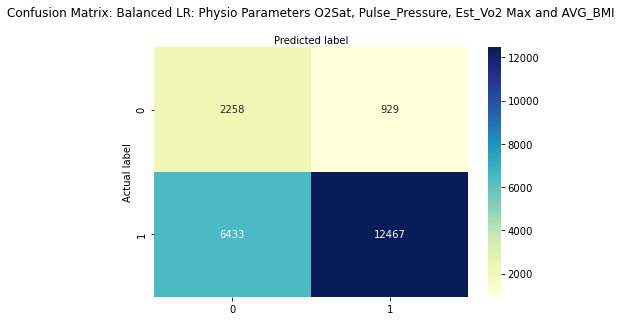

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix: Balanced LR: Physio Parameters O2Sat, Pulse_Pressure, Est_Vo2 Max and AVG_BMI', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Death', 'Survival']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Death       0.26      0.71      0.38      3187
    Survival       0.93      0.66      0.77     18900

    accuracy                           0.67     22087
   macro avg       0.60      0.68      0.58     22087
weighted avg       0.83      0.67      0.72     22087



In [ ]:
logmodel.score(X_test, y_test)

0.6666817585004754

In [ ]:
#I am going to try ensembling/majority voting classifiers to see if I can increase the accuracy score of 0.6666:

## Check results of applying k-nn on the data.
classifiers = [LogisticRegression(solver='liblinear', multi_class='auto',class_weight = 'balanced'), KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier()]
names = ["LR", "5-NN", "DecisionTree"]

#Like in class - I next add some options.
#Next voting among all 3 model types
classifiers.append( VotingClassifier([ (type(x).__name__, x) for x in classifiers ]) )
names.append("Vote(LR,5-NN,DT)")

classifiers.append( VotingClassifier([ (x, LogisticRegression(solver='liblinear', multi_class='auto') ) for x in "abc"  ]) )
names.append("Vote(LRx3)")

classifiers.append( VotingClassifier([ (str(x), KNeighborsClassifier() ) for x in range(3) ]) )
names.append("Vote(5-NNx3)")

print(classifiers)

[LogisticRegression(class_weight='balanced', solver='liblinear'), KNeighborsClassifier(), DecisionTreeClassifier(), VotingClassifier(estimators=[('LogisticRegression',
                              LogisticRegression(class_weight='balanced',
                                                 solver='liblinear')),
                             ('KNeighborsClassifier', KNeighborsClassifier()),
                             ('DecisionTreeClassifier',
                              DecisionTreeClassifier())]), VotingClassifier(estimators=[('a', LogisticRegression(solver='liblinear')),
                             ('b', LogisticRegression(solver='liblinear')),
                             ('c', LogisticRegression(solver='liblinear'))]), VotingClassifier(estimators=[('0', KNeighborsClassifier()),
                             ('1', KNeighborsClassifier()),
                             ('2', KNeighborsClassifier())])]


In [ ]:
## Now I am going to check the accuracy scores of the classifiers above on the second data frame with balanced LR
##(df2 = O2_Sat, Pulse_Pressure, Est_Vo2_Max )

print("df2", ":")
for model, m_name in zip(classifiers, names):
    model.fit(X_train, y_train)
    print("\t", m_name, accuracy_score(y_test, model.predict(X_test)))

df2 :
	 LR 0.66532349345769
	 5-NN 0.8320731652103047
	 DecisionTree 0.7697740752478833
	 Vote(LR,5-NN,DT) 0.7943586725222982
	 Vote(LRx3) 0.8552089464390819
	 Vote(5-NNx3) 0.8320731652103047


In [ ]:
# The Decision Tree method didn't outperform the LR in general for this dataset either
##(although Vote LR x 3 had nearly identical accuracy scores of 0.855.
##But I am still going to check accuracy of using Random Forest Classifier:
## which is actually an intrinsic  method of feature selection; decorrelating the decision trees
## and then see if we can at least determine the most important features in the model

model = RandomForestClassifier(n_estimators=100, oob_score=True)
model.fit(X_train, y_train)
print("accuracy:", accuracy_score(y_test, model.predict(X_test)))
print("\n feature importances:", model.feature_importances_)
print("\n sum of feature importances:", sum(model.feature_importances_) )
print("\n", X_train, "\n")
feat_labels = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print(f + 1,")", feat_labels[indices[f]], importances[indices[f]])

accuracy: 0.8458369176438629

 feature importances: [0.20057526 0.23563193 0.31802183 0.24577097]

 sum of feature importances: 1.0000000000000002

         AVG_O2SAT  Pulse_Pressure  Est_vO2_Max    AVG_BMI
97263   97.200000       60.400000    35.084483  29.050000
71296   99.428571       52.500000    33.032163  31.771429
32819   98.833333       63.260870    35.081465  31.535294
58193   97.695652       36.315789    34.268721  23.050000
79213   98.500000       61.000000    20.164977  29.800000
...           ...             ...          ...        ...
88906   96.942857       73.750000    21.758156  28.917073
17206   99.400000       54.800000    37.619505  24.650000
32656  100.000000       51.142857    34.802321  28.525000
6728    98.826087       48.041667    28.187401  35.845652
84135   94.000000       62.000000    19.413897  47.200000

[66259 rows x 4 columns] 

1 ) Est_vO2_Max 0.3180218301820881
2 ) AVG_BMI 0.24577097432533662
3 ) Pulse_Pressure 0.23563193385808376
4 ) AVG_O2SAT 0.20057

In [ ]:
## essentially identical to above.. Est_vO2_Max  most important, AVG_02SAT the least